In [2]:
!pip install python-binance

In [1]:
import ssl
import time
import json
import urllib
import hmac, hashlib
import statistics
import requests
import asyncio
import pandas as pd
import concurrent.futures
from urllib.parse import urlparse, urlencode
from urllib.request import Request, urlopen
from datetime import timezone
from collections import Counter
import time
import numpy as np
from threading import Timer
from _thread import start_new_thread
from statistics import mean
import matplotlib.pyplot as plt
from datetime import datetime
from binance.client import Client

import warnings
warnings.filterwarnings('ignore')

In [2]:
class Binance():
    methods = {
            # public methods
            'ping':             {'url':'api/v1/ping', 'method': 'GET', 'private': False},
            'time':             {'url':'api/v1/time', 'method': 'GET', 'private': False},
            'exchangeInfo':     {'url':'api/v1/exchangeInfo', 'method': 'GET', 'private': False},
            'depth':            {'url': 'api/v1/depth', 'method': 'GET', 'private': False},
            'trades':           {'url': 'api/v1/trades', 'method': 'GET', 'private': False},
            'historicalTrades': {'url': 'api/v1/historicalTrades', 'method': 'GET', 'private': False},
            'aggTrades':        {'url': 'api/v1/aggTrades', 'method': 'GET', 'private': False},
            'klines':           {'url': 'api/v1/klines', 'method': 'GET', 'private': False},
            'ticker24hr':       {'url': 'api/v1/ticker/24hr', 'method': 'GET', 'private': False},
            'tickerPrice':      {'url': 'api/v3/ticker/price', 'method': 'GET', 'private': False},
            'tickerBookTicker': {'url': 'api/v3/ticker/bookTicker', 'method': 'GET', 'private': False},
            # private methods
            'createOrder':      {'url': 'api/v3/order', 'method': 'POST', 'private': True},
            'testOrder':        {'url': 'api/v3/order/test', 'method': 'POST', 'private': True},
            'orderInfo':        {'url': 'api/v3/order', 'method': 'GET', 'private': True},
            'cancelOrder':      {'url': 'api/v3/order', 'method': 'DELETE', 'private': True},
            'openOrders':       {'url': 'api/v3/openOrders', 'method': 'GET', 'private': True},
            'allOrders':        {'url': 'api/v3/allOrders', 'method': 'GET', 'private': True},
            'account':          {'url': 'api/v3/account', 'method': 'GET', 'private': True},
            'myTrades':         {'url': 'api/v3/myTrades', 'method': 'GET', 'private': True},
            # wapi
            'depositAddress':   {'url': 'wapi/v3/depositAddress.html', 'method':'GET', 'private':True},
            'withdraw':   {'url': 'wapi/v3/withdraw.html', 'method':'POST', 'private':True},
            'depositHistory': {'url': 'wapi/v3/depositHistory.html', 'method':'GET', 'private':True},
            'withdrawHistory': {'url': 'wapi/v3/withdrawHistory.html', 'method':'GET', 'private':True},
            'assetDetail': {'url': 'wapi/v3/assetDetail.html', 'method':'GET', 'private':True},
            'tradeFee': {'url': 'wapi/v3/tradeFee.html', 'method':'GET', 'private':True},
            'accountStatus': {'url': 'wapi/v3/accountStatus.html', 'method':'GET', 'private':True},
            'systemStatus': {'url': 'wapi/v3/systemStatus.html', 'method':'GET', 'private':True},
            'assetDust': {'url': 'sapi/v1/asset/dust', 'method':'POST', 'private':True},
            'dustLog': {'url': 'wapi/v3/userAssetDribbletLog.html', 'method':'GET', 'private':True},
            'assetAssetDividend': {'url': 'sapi/v1/asset/assetDividend', 'method':'GET', 'private':True},
            #sapi
            'marginTransfer': {'url': 'sapi/v1/margin/transfer', 'method': 'POST', 'private':True},
            'marginLoan': {'url': 'sapi/v1/margin/loan', 'method': 'POST', 'private': True},
            'marginLoanGet': {'url': 'sapi/v1/margin/loan', 'method': 'GET', 'private': True},
            'marginRepay': {'url': 'sapi/v1/margin/repay', 'method': 'POST', 'private': True},
            'marginRepayGet': {'url': 'sapi/v1/margin/repay', 'method': 'GET', 'private': True},
            'marginCreateOrder': {'url': 'sapi/v1/margin/order', 'method': 'POST', 'private':True},
            'marginCancelOrder': {'url': 'sapi/v1/margin/order', 'method': 'DELETE', 'private':True},
            'marginOrderInfo': {'url': 'sapi/v1/margin/order', 'method': 'GET', 'private':True},
            'marginAccount': {'url': 'sapi/v1/margin/account', 'method': 'POST', 'private':True},
            'marginOpenOrders': {'url': 'sapi/v1/margin/openOrders', 'method': 'GET', 'private':True},
            'marginAllOrders': {'url': 'sapi/v1/margin/allOrders', 'method': 'GET', 'private':True},
            'marginAsset': {'url': 'sapi/v1/margin/asset', 'method': 'POST', 'private':True},
            'marginPair': {'url': 'sapi/v1/margin/pair', 'method': 'POST', 'private':True},
            'marginPriceIndex': {'url': 'sapi/v1/margin/priceIndex', 'method': 'POST', 'private':True},
            'marginMyTrades': {'url': 'sapi/v1/margin/myTrades', 'method': 'GET', 'private':True},
            'marginMaxBorrowable': {'url': 'sapi/v1/margin/maxBorrowable', 'method': 'GET', 'private':True},
            'marginmaxTransferable': {'url': 'sapi/v1/margin/maxTransferable', 'method': 'GET', 'private':True},
            #futures
            'futuresExchangeInfo': {'url': 'fapi/v1/exchangeInfo', 'method': 'GET', 'private': False, 'futures': True},
            'futuresKlines': {'url': 'fapi/v1/klines', 'method': 'GET', 'private': False, 'futures': True},
            'futuresCreateOrder':      {'url': 'fapi/v1/order', 'method': 'POST', 'private': True, 'futures': True},
            'futuresAccount':      {'url': 'fapi/v1/account', 'method': 'POST', 'private': True, 'futures': True},
            'futuresBalance':      {'url': 'fapi/v1/balance', 'method': 'GET', 'private': True, 'futures': True},
            'futuresSymbolPriceTicker': {'url': 'fapi/v1/ticker/price', 'method': 'GET', 'private': True, 'futures': True},
            'futuresOrderInfo': {'url': 'fapi/v1/order', 'method': 'GET', 'private': True, 'futures': True},
            'futuresCancelOrder':      {'url': 'fapi/v1/order', 'method': 'DELETE', 'private': True, 'futures': True},
   }

    def __init__(self, API_KEY, API_SECRET):
        self.API_KEY = API_KEY
        self.API_SECRET = bytearray(API_SECRET, encoding='utf-8')
        self.shift_seconds = 0

    def __getattr__(self, name):
        def wrapper(*args, **kwargs):
            kwargs.update(command=name)
            return self.call_api(**kwargs)
        return wrapper

    def set_shift_seconds(self, seconds):
        self.shift_seconds = seconds

    def call_api(self, **kwargs):

        command = kwargs.pop('command')

        base_url ='https://api.binance.com/'
        if self.methods[command].get('futures'):
            base_url = 'https://fapi.binance.com/'
        api_url = base_url  + self.methods[command]['url']

        payload = kwargs
        headers = {}

        payload_str = urllib.parse.urlencode(payload)
        if self.methods[command]['private']:
            payload.update({'timestamp': int(time.time() + self.shift_seconds - 1) * 1000})
            payload_str = urllib.parse.urlencode(payload).encode('utf-8')
            sign = hmac.new(
                key=self.API_SECRET,
                msg=payload_str,
                digestmod=hashlib.sha256
            ).hexdigest()

            payload_str = payload_str.decode("utf-8") + "&signature="+str(sign)
            headers = {"X-MBX-APIKEY": self.API_KEY, "Content-Type":"application/x-www-form-urlencoded"}

        if self.methods[command]['method'] == 'GET' or self.methods[command]['url'].startswith('sapi'):
            api_url += '?' + payload_str

        response = requests.request(method=self.methods[command]['method'], url=api_url, data="" if self.methods[command]['method'] == 'GET' else payload_str, headers=headers)

        if 'code' in response.text:
            raise Exception(response.text)

        return response.json()

bot = Binance(
    API_KEY='',
    API_SECRET=''
)

In [3]:
def client_create(api_list):
    clients = []
    for api_keys in api_list:
        clients.append(Binance(API_KEY = api_keys['apikey'],API_SECRET = api_keys['apisecret']))
    return clients

_API_LIST_ = [
]

In [4]:
coin_list=[]
pairs = bot.futuresExchangeInfo()
for s in pairs['symbols']:
    if 'USDT' in s['symbol'] and '0' not in s['symbol']:
        coin_list.append(s['symbol'])
print(coin_list)

['BTCUSDT', 'ETHUSDT', 'BCHUSDT', 'XRPUSDT', 'EOSUSDT', 'LTCUSDT', 'TRXUSDT', 'ETCUSDT', 'LINKUSDT', 'XLMUSDT', 'ADAUSDT', 'XMRUSDT', 'DASHUSDT', 'ZECUSDT', 'XTZUSDT', 'BNBUSDT', 'ATOMUSDT', 'ONTUSDT', 'IOTAUSDT', 'BATUSDT', 'VETUSDT', 'NEOUSDT', 'QTUMUSDT', 'IOSTUSDT', 'THETAUSDT', 'ALGOUSDT', 'ZILUSDT', 'KNCUSDT', 'ZRXUSDT', 'COMPUSDT', 'OMGUSDT', 'DOGEUSDT', 'SXPUSDT', 'KAVAUSDT', 'BANDUSDT', 'RLCUSDT', 'WAVESUSDT', 'MKRUSDT', 'SNXUSDT', 'DOTUSDT', 'DEFIUSDT', 'YFIUSDT', 'BALUSDT', 'CRVUSDT', 'TRBUSDT', 'RUNEUSDT', 'SUSHIUSDT', 'SRMUSDT', 'EGLDUSDT', 'SOLUSDT', 'ICXUSDT', 'STORJUSDT', 'BLZUSDT', 'UNIUSDT', 'AVAXUSDT', 'FTMUSDT', 'HNTUSDT', 'ENJUSDT', 'FLMUSDT', 'TOMOUSDT', 'RENUSDT', 'KSMUSDT', 'NEARUSDT', 'AAVEUSDT', 'FILUSDT', 'RSRUSDT', 'LRCUSDT', 'MATICUSDT', 'OCEANUSDT', 'CVCUSDT', 'BELUSDT', 'CTKUSDT', 'AXSUSDT', 'ALPHAUSDT', 'ZENUSDT', 'SKLUSDT', 'GRTUSDT', '1INCHUSDT', 'CHZUSDT', 'SANDUSDT', 'ANKRUSDT', 'BTSUSDT', 'LITUSDT', 'UNFIUSDT', 'REEFUSDT', 'RVNUSDT', 'SFPUSDT', 'XEM

In [5]:
new_coin_list=[]
try:
    for i in coin_list:
        vol = bot.ticker24hr(symbol=i)
        if float(vol['priceChangePercent'])>7 or float(vol['priceChangePercent'])<-7:
            new_coin_list.append(i)
except:
    pass
print(new_coin_list)

['XTZUSDT', 'BATUSDT', 'VETUSDT', 'IOSTUSDT', 'THETAUSDT', 'ALGOUSDT', 'COMPUSDT', 'KAVAUSDT', 'BANDUSDT', 'RLCUSDT', 'MKRUSDT']


In [4]:
_LIMIT_ = 1000
_SYMBOL_ = 'ALGOUSDT'
_SECONDS_ = 60
_INTERVAL_ = f"{_SECONDS_//60}m"

In [5]:
def TimeNow():
  now = datetime.now()
  return now.strftime('%Y-%m-%d %H:%M:%S')

def time_stamp_to_normal(inputTime):
  return datetime.utcfromtimestamp(inputTime/1000).strftime('%Y-%m-%d %H:%M:%S')

def wait_time(delta_time):
  a = True
  while a:
    time.sleep(0.1)
    _timenow_ = str(TimeNow()).split(":")
    _timenow_ = _timenow_[len(_timenow_)-1]
    if int(_timenow_)%5 == 0:
      a = False

def TimeStampNow():
  return time.time()

def check(a, b):
  for i in a:
    if b == i:
      return True
  return False
def MinetsTimestamp(minets):
  return minets*60*1000
def TimestampToNormal(inputTime):
  return datetime.utcfromtimestamp(inputTime/1000).strftime('%Y-%m-%d %H:%M:%S')
def NormalToTimestamp(inputTime):
  return int(datetime.strptime(inputTime, '%Y-%m-%d %H:%M:%S').timestamp()*1000)
def klines_parsing(_klines_):
  _klines_final_ = []

  for _i_ in _klines_:
    _klines_final_.append({
    "Open time": TimestampToNormal(_i_[0]+60*60*3*1000),
    "Open": float(_i_[1]),
    "High": float(_i_[2]),
    "Low": float(_i_[3]),
    "Close": float(_i_[4]),
    "Volume": float(_i_[5]),
    "Close time": TimestampToNormal(_i_[6]+60*60*3*1000),
    "Quote asset volume": _i_[7],
    "Number of trades": _i_[8],
    "Taker buy base asset volume": _i_[9],
    "Taker buy quote asset volume": _i_[10],
    "Ignore": _i_[11]
    })
  return _klines_final_

TimestampNow = NormalToTimestamp(TimeNow())
close = []
close_max = []
close_min = []
for i in range(1, 37):
  _MINETS_ = 240
  _INTERVAL_ = "5m"

  _klines_ = bot.klines(
                symbol=_SYMBOL_,
                limit=_MINETS_,
                interval=_INTERVAL_,
                startTime=TimestampNow - MinetsTimestamp(_MINETS_*i),
                endTime=TimestampNow - MinetsTimestamp(_MINETS_*(i-1)),
  )
  _klines_ = klines_parsing(_klines_)
  _klines_ = pd.DataFrame(_klines_)
  for i in _klines_['Close']:
    close.append(i)
  close_max.append(max(close))
  close_min.append(min(close))
  close.clear()

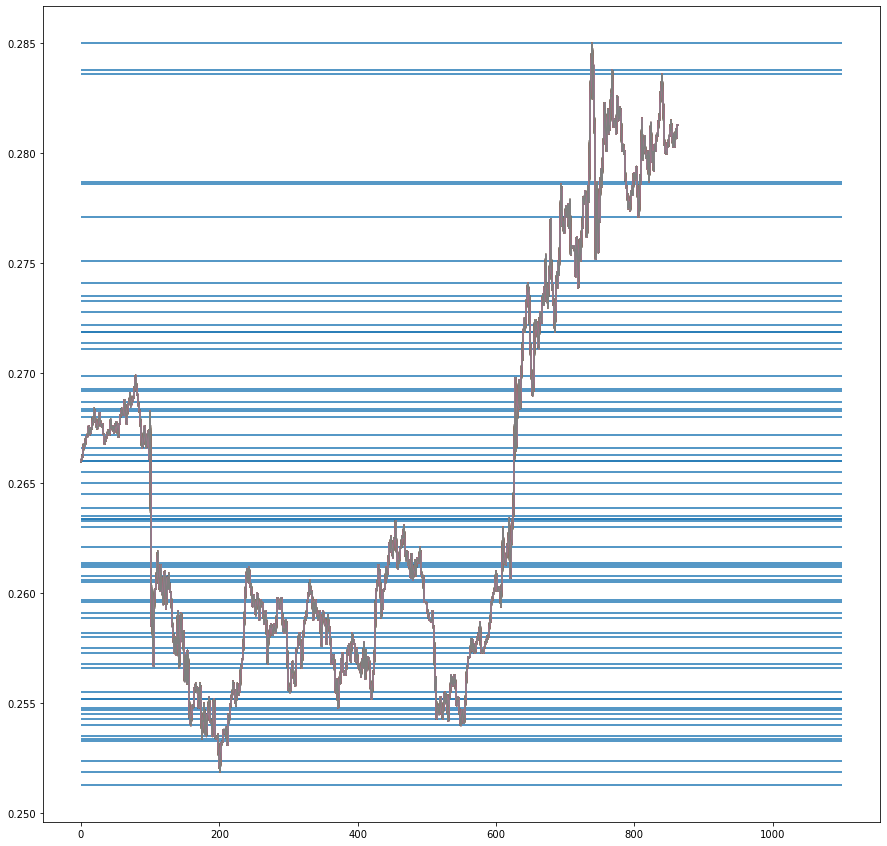

In [6]:
_klines_all_ = bot.klines(
                symbol=_SYMBOL_,
                limit=1440*3,
                interval=_INTERVAL_,
                startTime=TimestampNow - MinetsTimestamp(1440*3),
                endTime=TimestampNow,
  )
_klines_all_ = klines_parsing(_klines_all_)
_klines_all_ = pd.DataFrame(_klines_all_)
plt.figure(figsize=(15, 15))
for i in set(close_max):
  x = _klines_all_['Close']
  plt.hlines(y=i, xmin=0, xmax=1100)
  plt.plot(x)
for i in set(close_min):
  x = _klines_all_['Close']
  plt.hlines(y=i, xmin=0, xmax=1100)
  plt.plot(x)
plt.show()


In [7]:
close_max_min = close_max+close_min
counter_max_min = Counter(close_max_min)
print(counter_max_min)
print(close_max_min)

Counter({0.266: 4, 0.2634: 2, 0.2719: 2, 0.2552: 2, 0.2568: 2, 0.2655: 2, 0.2836: 1, 0.2838: 1, 0.285: 1, 0.2786: 1, 0.2741: 1, 0.2582: 1, 0.2621: 1, 0.2633: 1, 0.2613: 1, 0.2597: 1, 0.2606: 1, 0.2612: 1, 0.2608: 1, 0.2591: 1, 0.2683: 1, 0.2699: 1, 0.2684: 1, 0.2687: 1, 0.2714: 1, 0.2735: 1, 0.2693: 1, 0.2722: 1, 0.2711: 1, 0.2728: 1, 0.2733: 1, 0.2663: 1, 0.258: 1, 0.263: 1, 0.2672: 1, 0.2639: 1, 0.2605: 1, 0.2575: 1, 0.2787: 1, 0.2771: 1, 0.2751: 1, 0.2573: 1, 0.254: 1, 0.2543: 1, 0.2589: 1, 0.2548: 1, 0.2555: 1, 0.2519: 1, 0.2534: 1, 0.2566: 1, 0.2666: 1, 0.2635: 1, 0.265: 1, 0.268: 1, 0.2692: 1, 0.2645: 1, 0.2614: 1, 0.2533: 1, 0.2524: 1, 0.2513: 1, 0.2545: 1, 0.2596: 1, 0.2547: 1, 0.2535: 1})
[0.2836, 0.2838, 0.285, 0.2786, 0.2741, 0.2634, 0.2582, 0.2621, 0.2633, 0.2613, 0.2597, 0.2606, 0.2612, 0.2608, 0.2591, 0.2683, 0.2699, 0.2684, 0.266, 0.2687, 0.2714, 0.2735, 0.2719, 0.2693, 0.2722, 0.2711, 0.2728, 0.2733, 0.2663, 0.2552, 0.258, 0.263, 0.2672, 0.2639, 0.2605, 0.2575, 0.2787, 

In [10]:
i=0
profit=0
start_sum=700
lots=10
how_more_mean_vol=3
stop_loss=0.999
take_profit=1.002
right_answer=0
false_answer=0
bot_number=0
commission=0.000162
close_max_copy=close_max.copy()
close_min_copy=close_min.copy()
BOT_LIST = client_create(_API_LIST_)

while True:
    try:
        i+=1
        if bot_number == 12:
            bot_number = 0
        bot_number+=1
        bids=[]
        asks=[]
        glass = BOT_LIST[bot_number].depth(symbol=_SYMBOL_)
        last_price = BOT_LIST[bot_number].ticker24hr(symbol=_SYMBOL_)
        bids_list_vol=[]
        for j in glass['bids']:
            bids_list_vol.append(j[1])
        bids_list_vol = np.array(bids_list_vol).astype(np.float)
        a = np.mean(bids_list_vol)*how_more_mean_vol
        for u in glass['bids']:
            if float(u[1])>a:
                bids.append(u[0])
        for f in glass['asks']:
            if float(f[1])>a:
                asks.append(f[0])

        last_price = BOT_LIST[bot_number].ticker24hr(symbol=_SYMBOL_)
        last = last_price['lastPrice']
        bids = np.array(bids).astype(np.float)
        asks = np.array(asks).astype(np.float)
        nearest_bids = min(set(bids), key=lambda x:abs(x-float(last_price['lastPrice'])))
        nearest_asks = min(set(asks), key=lambda x:abs(x-float(last_price['lastPrice'])))
        nearest_close_max = min(close_max_copy, key=lambda x:abs(x-float(last_price['lastPrice'])))
        nearest_close_min = min(close_min_copy, key=lambda x:abs(x-float(last_price['lastPrice'])))
        #try:
        last_price = BOT_LIST[bot_number].ticker24hr(symbol=_SYMBOL_)
        lots=start_sum/float(last_price['lastPrice'])
        if float(last_price['lastPrice']) == nearest_close_max:
            start_asks=last_price['lastPrice']
            print('Работаем на пробой', 'buy asks', last_price['lastPrice'])
            while True:
                last_price = BOT_LIST[bot_number].ticker24hr(symbol=_SYMBOL_)
                if float(last_price['lastPrice'])<float(start_asks)*stop_loss:
                    end_asks=last_price['lastPrice']
                    print('Закрылись по стопу', 'sell asks', last_price['lastPrice'])
                    false_answer+=1
                    break
                if float(last_price['lastPrice'])>float(start_asks)*take_profit:
                    end_asks=last_price['lastPrice']
                    print('Закрылись по тейку', 'sell asks', last_price['lastPrice'])
                    set(close_max_copy).remove(nearest_close_max) 
                    right_answer+=1
                    break
            profit=(float(end_asks)*lots-float(start_asks)*lots+float(profit))-(float(start_asks)*0.000162*lots+float(end_asks)*0.000162*lots)
            start_sum=(float(end_asks)*lots-float(start_asks)*lots)-(float(start_asks)*0.000162*lots+float(end_asks)*0.000162*lots)+start_sum

        last_price = BOT_LIST[bot_number].ticker24hr(symbol=_SYMBOL_)
        lots=start_sum/float(last_price['lastPrice'])    
        if float(last_price['lastPrice']) == nearest_close_min:
            start_bids=last_price['lastPrice']
            print('Работаем на пробой', 'buy bids', start_bids)
            while True:
                last_price = BOT_LIST[bot_number].ticker24hr(symbol=_SYMBOL_)
                if float(last_price['lastPrice'])<float(start_bids)*stop_loss:
                    end_bids=last_price['lastPrice']
                    print('Закрылись по тейку', 'sell bids', last_price['lastPrice'])
                    set(close_min_copy).remove(nearest_close_min)
                    right_answer+=1
                    break
                if float(last_price['lastPrice'])>float(start_bids)*take_profit:
                    end_bids=last_price['lastPrice']
                    print('Закрылись по стопу', 'sell bids', last_price['lastPrice'])
                    false_answer+=1
                    break 
            profit=(float(start_bids)*lots-float(end_bids)*lots+float(profit))-(float(end_bids)*0.000162*lots+float(start_bids)*0.000162*lots)
            start_sum=(float(start_bids)*lots-float(end_bids)*lots)-(float(end_bids)*0.000162*lots+float(start_bids)*0.000162*lots)+start_sum    

        last_price = BOT_LIST[bot_number].ticker24hr(symbol=_SYMBOL_)
        lots=start_sum/float(last_price['lastPrice'])
        if float(last_price['lastPrice']) == nearest_bids:
            start_bids=last_price['lastPrice']
            print('Работаем на отскок', 'buy bids', start_bids)
            while True:
                last_price = BOT_LIST[bot_number].ticker24hr(symbol=_SYMBOL_)
                if float(last_price['lastPrice'])<float(start_bids)*stop_loss:
                    end_bids=last_price['lastPrice']
                    print('Закрылись по стопу', 'sell bids', last_price['lastPrice'])
                    false_answer+=1
                    break
                if float(last_price['lastPrice'])>float(start_bids)*take_profit:
                    end_bids=last_price['lastPrice']
                    print('Закрылись по тейку', 'sell bids', last_price['lastPrice'])
                    right_answer+=1
                    break
            profit=(float(end_bids)*lots-float(start_bids)*lots+float(profit))-(float(end_bids)*0.000162*lots+float(start_bids)*0.000162*lots)
            start_sum=(float(end_bids)*lots-float(start_bids)*lots)-(float(end_bids)*0.000162*lots+float(start_bids)*0.000162*lots)+start_sum        
            set(bids).remove(nearest_bids)            

        last_price = BOT_LIST[bot_number].ticker24hr(symbol=_SYMBOL_)
        lots=start_sum/float(last_price['lastPrice'])    
        if float(last_price['lastPrice']) == nearest_asks:
            start_asks=last_price['lastPrice']
            print('Работаем на отскок', 'buy asks', last_price['lastPrice'])
            while True:
                last_price = BOT_LIST[bot_number].ticker24hr(symbol=_SYMBOL_)
                if float(last_price['lastPrice'])<float(start_asks)*stop_loss:
                    end_asks=last_price['lastPrice']
                    print('Закрылись по тейку', 'sell asks', last_price['lastPrice'])
                    right_answer+=1
                    break
                if float(last_price['lastPrice'])>float(start_asks)*take_profit:
                    end_asks=last_price['lastPrice']
                    print('Закрылись по стопу', 'sell asks', last_price['lastPrice'])
                    false_answer+=1
                    break        
            profit=(float(start_asks)*lots-float(end_asks)*lots+float(profit))-(float(start_asks)*0.000162*lots+float(end_asks)*0.000162*lots)
            start_sum=(float(start_asks)*lots-float(end_asks)*lots)-(float(start_asks)*0.000162*lots+float(end_asks)*0.000162*lots)+start_sum
            set(asks).remove(nearest_asks)

    #     except:
    #         pass
        if i%15==0:
            list(bids).clear()
            list(asks).clear()
        print('Заработали:', profit)
        print('Правильных ответов:', right_answer, 'Неправильных ответов:', false_answer)
        print('Конечеая сумма:', start_sum, 'Кол-во торгуемых лотов:', lots)
    except Exception as err:
        print('Ошибка:', err)


Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 700 Кол-во торгуемых лотов: 2422.9837313949465
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 700 Кол-во торгуемых лотов: 2423.8227146814406
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 700 Кол-во торгуемых лотов: 2422.9837313949465
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 700 Кол-во торгуемых лотов: 2422.9837313949465
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 700 Кол-во торгуемых лотов: 2422.9837313949465
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 700 Кол-во торгуемых лотов: 2422.1453287197232
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 700 Кол-во торгуемых лотов: 2421.3075060532688
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 700 Кол-во торгуемых лотов: 2422.1453287197232
Заработали: 0
Пр

Заработали: -2.1621514858328488
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 697.8378485141671 Кол-во торгуемых лотов: 2403.0228943325315
Заработали: -2.1621514858328488
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 697.8378485141671 Кол-во торгуемых лотов: 2402.1956919592676
Заработали: -2.1621514858328488
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 697.8378485141671 Кол-во торгуемых лотов: 2402.1956919592676
Заработали: -2.1621514858328488
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 697.8378485141671 Кол-во торгуемых лотов: 2402.1956919592676
Заработали: -2.1621514858328488
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 697.8378485141671 Кол-во торгуемых лотов: 2403.8506666006447
Заработали: -2.1621514858328488
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 697.8378485141671 Кол-во торгуемых лотов: 2403.8506666006447
Заработали: -2.1621514858328488
Правильных ответов: 0 Неправильных отв

Заработали: -3.3499667292927207
Правильных ответов: 0 Неправильных ответов: 2
Конечеая сумма: 696.6500332707072 Кол-во торгуемых лотов: 2405.559507150232
Заработали: -3.3499667292927207
Правильных ответов: 0 Неправильных ответов: 2
Конечеая сумма: 696.6500332707072 Кол-во торгуемых лотов: 2407.2219532505433
Заработали: -3.3499667292927207
Правильных ответов: 0 Неправильных ответов: 2
Конечеая сумма: 696.6500332707072 Кол-во торгуемых лотов: 2407.2219532505433
Заработали: -3.3499667292927207
Правильных ответов: 0 Неправильных ответов: 2
Конечеая сумма: 696.6500332707072 Кол-во торгуемых лотов: 2408.0540382672216
Заработали: -3.3499667292927207
Правильных ответов: 0 Неправильных ответов: 2
Конечеая сумма: 696.6500332707072 Кол-во торгуемых лотов: 2408.0540382672216
Работаем на отскок buy asks 0.28940000
Закрылись по стопу sell asks 0.29000000
Заработали: -5.02024849399652
Правильных ответов: 0 Неправильных ответов: 3
Конечеая сумма: 694.9797515060035 Кол-во торгуемых лотов: 2407.22195325

Заработали: -5.02024849399652
Правильных ответов: 0 Неправильных ответов: 3
Конечеая сумма: 694.9797515060035 Кол-во торгуемых лотов: 2386.6062895123746
Заработали: -5.02024849399652
Правильных ответов: 0 Неправильных ответов: 3
Конечеая сумма: 694.9797515060035 Кол-во торгуемых лотов: 2386.6062895123746
Заработали: -5.02024849399652
Правильных ответов: 0 Неправильных ответов: 3
Конечеая сумма: 694.9797515060035 Кол-во торгуемых лотов: 2384.150090929686
Заработали: -5.02024849399652
Правильных ответов: 0 Неправильных ответов: 3
Конечеая сумма: 694.9797515060035 Кол-во торгуемых лотов: 2383.3324811591337
Заработали: -5.02024849399652
Правильных ответов: 0 Неправильных ответов: 3
Конечеая сумма: 694.9797515060035 Кол-во торгуемых лотов: 2381.6989427895937
Заработали: -5.02024849399652
Правильных ответов: 0 Неправильных ответов: 3
Конечеая сумма: 694.9797515060035 Кол-во торгуемых лотов: 2380.8830130387237
Заработали: -5.02024849399652
Правильных ответов: 0 Неправильных ответов: 3
Конечеа

Заработали: -5.02024849399652
Правильных ответов: 0 Неправильных ответов: 3
Конечеая сумма: 694.9797515060035 Кол-во торгуемых лотов: 2386.6062895123746
Заработали: -5.02024849399652
Правильных ответов: 0 Неправильных ответов: 3
Конечеая сумма: 694.9797515060035 Кол-во торгуемых лотов: 2387.4261473926604
Заработали: -5.02024849399652
Правильных ответов: 0 Неправильных ответов: 3
Конечеая сумма: 694.9797515060035 Кол-во торгуемых лотов: 2387.4261473926604
Заработали: -5.02024849399652
Правильных ответов: 0 Неправильных ответов: 3
Конечеая сумма: 694.9797515060035 Кол-во торгуемых лотов: 2388.246568749153
Заработали: -5.02024849399652
Правильных ответов: 0 Неправильных ответов: 3
Конечеая сумма: 694.9797515060035 Кол-во торгуемых лотов: 2387.4261473926604
Заработали: -5.02024849399652
Правильных ответов: 0 Неправильных ответов: 3
Конечеая сумма: 694.9797515060035 Кол-во торгуемых лотов: 2388.246568749153
Заработали: -5.02024849399652
Правильных ответов: 0 Неправильных ответов: 3
Конечеая

Заработали: -5.959326554840056
Правильных ответов: 0 Неправильных ответов: 4
Конечеая сумма: 694.04067344516 Кол-во торгуемых лотов: 2383.381433534203
Заработали: -5.959326554840056
Правильных ответов: 0 Неправильных ответов: 4
Конечеая сумма: 694.04067344516 Кол-во торгуемых лотов: 2383.381433534203
Заработали: -5.959326554840056
Правильных ответов: 0 Неправильных ответов: 4
Конечеая сумма: 694.04067344516 Кол-во торгуемых лотов: 2385.0194963751205
Заработали: -5.959326554840056
Правильных ответов: 0 Неправильных ответов: 4
Конечеая сумма: 694.04067344516 Кол-во торгуемых лотов: 2385.0194963751205
Заработали: -5.959326554840056
Правильных ответов: 0 Неправильных ответов: 4
Конечеая сумма: 694.04067344516 Кол-во торгуемых лотов: 2385.0194963751205
Заработали: -5.959326554840056
Правильных ответов: 0 Неправильных ответов: 4
Конечеая сумма: 694.04067344516 Кол-во торгуемых лотов: 2385.0194963751205
Заработали: -5.959326554840056
Правильных ответов: 0 Неправильных ответов: 4
Конечеая сумм

Заработали: -5.959326554840056
Правильных ответов: 0 Неправильных ответов: 4
Конечеая сумма: 694.04067344516 Кол-во торгуемых лотов: 2371.9776946177712
Заработали: -5.959326554840056
Правильных ответов: 0 Неправильных ответов: 4
Конечеая сумма: 694.04067344516 Кол-во торгуемых лотов: 2372.7886271629404
Заработали: -5.959326554840056
Правильных ответов: 0 Неправильных ответов: 4
Конечеая сумма: 694.04067344516 Кол-во торгуемых лотов: 2372.7886271629404
Заработали: -5.959326554840056
Правильных ответов: 0 Неправильных ответов: 4
Конечеая сумма: 694.04067344516 Кол-во торгуемых лотов: 2372.7886271629404
Заработали: -5.959326554840056
Правильных ответов: 0 Неправильных ответов: 4
Конечеая сумма: 694.04067344516 Кол-во торгуемых лотов: 2370.3574912744534
Заработали: -5.959326554840056
Правильных ответов: 0 Неправильных ответов: 4
Конечеая сумма: 694.04067344516 Кол-во торгуемых лотов: 2369.5482193416183
Работаем на отскок buy asks 0.29300000
Закрылись по стопу sell asks 0.29360000
Заработал

Заработали: -5.466150994789254
Правильных ответов: 2 Неправильных ответов: 5
Конечеая сумма: 694.5338490052108 Кол-во торгуемых лотов: 2347.9846146220784
Заработали: -5.466150994789254
Правильных ответов: 2 Неправильных ответов: 5
Конечеая сумма: 694.5338490052108 Кол-во торгуемых лотов: 2349.5732375007133
Заработали: -5.466150994789254
Правильных ответов: 2 Неправильных ответов: 5
Конечеая сумма: 694.5338490052108 Кол-во торгуемых лотов: 2348.7786574406855
Заработали: -5.466150994789254
Правильных ответов: 2 Неправильных ответов: 5
Конечеая сумма: 694.5338490052108 Кол-во торгуемых лотов: 2350.368355347583
Заработали: -5.466150994789254
Правильных ответов: 2 Неправильных ответов: 5
Конечеая сумма: 694.5338490052108 Кол-во торгуемых лотов: 2350.368355347583
Заработали: -5.466150994789254
Правильных ответов: 2 Неправильных ответов: 5
Конечеая сумма: 694.5338490052108 Кол-во торгуемых лотов: 2349.5732375007133
Заработали: -5.466150994789254
Правильных ответов: 2 Неправильных ответов: 5
К

Заработали: -2.378405293565905
Правильных ответов: 5 Неправильных ответов: 5
Конечеая сумма: 697.6215947064342 Кол-во торгуемых лотов: 2358.4232410629957
Заработали: -2.378405293565905
Правильных ответов: 5 Неправильных ответов: 5
Конечеая сумма: 697.6215947064342 Кол-во торгуемых лотов: 2359.220814022435
Заработали: -2.378405293565905
Правильных ответов: 5 Неправильных ответов: 5
Конечеая сумма: 697.6215947064342 Кол-во торгуемых лотов: 2359.220814022435
Заработали: -2.378405293565905
Правильных ответов: 5 Неправильных ответов: 5
Конечеая сумма: 697.6215947064342 Кол-во торгуемых лотов: 2360.018926611753
Заработали: -2.378405293565905
Правильных ответов: 5 Неправильных ответов: 5
Конечеая сумма: 697.6215947064342 Кол-во торгуемых лотов: 2359.220814022435
Заработали: -2.378405293565905
Правильных ответов: 5 Неправильных ответов: 5
Конечеая сумма: 697.6215947064342 Кол-во торгуемых лотов: 2358.4232410629957
Заработали: -2.378405293565905
Правильных ответов: 5 Неправильных ответов: 5
Кон

Заработали: -3.3132848731858835
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 696.6867151268142 Кол-во торгуемых лотов: 2365.659474114819
Заработали: -3.3132848731858835
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 696.6867151268142 Кол-во торгуемых лотов: 2365.659474114819
Заработали: -3.3132848731858835
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 696.6867151268142 Кол-во торгуемых лотов: 2365.659474114819
Заработали: -3.3132848731858835
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 696.6867151268142 Кол-во торгуемых лотов: 2365.659474114819
Заработали: -3.3132848731858835
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 696.6867151268142 Кол-во торгуемых лотов: 2364.0540045022535
Заработали: -3.3132848731858835
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 696.6867151268142 Кол-во торгуемых лотов: 2364.8564668255744
Заработали: -3.3132848731858835
Правильных ответов: 5 Неправильных ответов

Заработали: -3.3132848731858835
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 696.6867151268142 Кол-во торгуемых лотов: 2361.649881785811
Заработали: -3.3132848731858835
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 696.6867151268142 Кол-во торгуемых лотов: 2362.450712535823
Заработали: -3.3132848731858835
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 696.6867151268142 Кол-во торгуемых лотов: 2361.649881785811
Заработали: -3.3132848731858835
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 696.6867151268142 Кол-во торгуемых лотов: 2361.649881785811
Заработали: -3.3132848731858835
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 696.6867151268142 Кол-во торгуемых лотов: 2362.450712535823
Заработали: -3.3132848731858835
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 696.6867151268142 Кол-во торгуемых лотов: 2360.849593787917
Заработали: -3.3132848731858835
Правильных ответов: 5 Неправильных ответов: 

Заработали: -2.8174937321868074
Правильных ответов: 6 Неправильных ответов: 7
Конечеая сумма: 697.1825062678132 Кол-во торгуемых лотов: 2371.36906893814
Заработали: -2.8174937321868074
Правильных ответов: 6 Неправильных ответов: 7
Конечеая сумма: 697.1825062678132 Кол-во торгуемых лотов: 2374.599816988464
Заработали: -2.8174937321868074
Правильных ответов: 6 Неправильных ответов: 7
Конечеая сумма: 697.1825062678132 Кол-во торгуемых лотов: 2372.983343321352
Заработали: -2.8174937321868074
Правильных ответов: 6 Неправильных ответов: 7
Конечеая сумма: 697.1825062678132 Кол-во торгуемых лотов: 2372.983343321352
Заработали: -2.8174937321868074
Правильных ответов: 6 Неправильных ответов: 7
Конечеая сумма: 697.1825062678132 Кол-во торгуемых лотов: 2375.408879958478
Заработали: -2.8174937321868074
Правильных ответов: 6 Неправильных ответов: 7
Конечеая сумма: 697.1825062678132 Кол-во торгуемых лотов: 2377.028660988112
Заработали: -2.8174937321868074
Правильных ответов: 6 Неправильных ответов: 7

Заработали: -4.708138077326917
Правильных ответов: 6 Неправильных ответов: 8
Конечеая сумма: 695.2918619226731 Кол-во торгуемых лотов: 2369.7745805135414
Заработали: -4.708138077326917
Правильных ответов: 6 Неправильных ответов: 8
Конечеая сумма: 695.2918619226731 Кол-во торгуемых лотов: 2371.3910706776023
Заработали: -4.708138077326917
Правильных ответов: 6 Неправильных ответов: 8
Конечеая сумма: 695.2918619226731 Кол-во торгуемых лотов: 2371.3910706776023
Заработали: -4.708138077326917
Правильных ответов: 6 Неправильных ответов: 8
Конечеая сумма: 695.2918619226731 Кол-во торгуемых лотов: 2370.5825500261612
Заработали: -4.708138077326917
Правильных ответов: 6 Неправильных ответов: 8
Конечеая сумма: 695.2918619226731 Кол-во торгуемых лотов: 2371.3910706776023
Заработали: -4.708138077326917
Правильных ответов: 6 Неправильных ответов: 8
Конечеая сумма: 695.2918619226731 Кол-во торгуемых лотов: 2371.3910706776023
Заработали: -4.708138077326917
Правильных ответов: 6 Неправильных ответов: 8

Заработали: -5.155207438014279
Правильных ответов: 7 Неправильных ответов: 9
Конечеая сумма: 694.8447925619857 Кол-во торгуемых лотов: 2356.204789969433
Заработали: -5.155207438014279
Правильных ответов: 7 Неправильных ответов: 9
Конечеая сумма: 694.8447925619857 Кол-во торгуемых лотов: 2355.4060764813075
Заработали: -5.155207438014279
Правильных ответов: 7 Неправильных ответов: 9
Конечеая сумма: 694.8447925619857 Кол-во торгуемых лотов: 2355.4060764813075
Заработали: -5.155207438014279
Правильных ответов: 7 Неправильных ответов: 9
Конечеая сумма: 694.8447925619857 Кол-во торгуемых лотов: 2355.4060764813075
Заработали: -5.155207438014279
Правильных ответов: 7 Неправильных ответов: 9
Конечеая сумма: 694.8447925619857 Кол-во торгуемых лотов: 2358.604183849239
Заработали: -5.155207438014279
Правильных ответов: 7 Неправильных ответов: 9
Конечеая сумма: 694.8447925619857 Кол-во торгуемых лотов: 2358.604183849239
Заработали: -5.155207438014279
Правильных ответов: 7 Неправильных ответов: 9
Ко

Заработали: -6.5602492223153215
Правильных ответов: 7 Неправильных ответов: 10
Конечеая сумма: 693.4397507776847 Кол-во торгуемых лотов: 2360.2442163978376
Заработали: -6.5602492223153215
Правильных ответов: 7 Неправильных ответов: 10
Конечеая сумма: 693.4397507776847 Кол-во торгуемых лотов: 2360.2442163978376
Заработали: -6.5602492223153215
Правильных ответов: 7 Неправильных ответов: 10
Конечеая сумма: 693.4397507776847 Кол-во торгуемых лотов: 2360.2442163978376
Заработали: -6.5602492223153215
Правильных ответов: 7 Неправильных ответов: 10
Конечеая сумма: 693.4397507776847 Кол-во торгуемых лотов: 2360.2442163978376
Заработали: -6.5602492223153215
Правильных ответов: 7 Неправильных ответов: 10
Конечеая сумма: 693.4397507776847 Кол-во торгуемых лотов: 2360.2442163978376
Заработали: -6.5602492223153215
Правильных ответов: 7 Неправильных ответов: 10
Конечеая сумма: 693.4397507776847 Кол-во торгуемых лотов: 2361.0478405777485
Заработали: -6.5602492223153215
Правильных ответов: 7 Неправильн

Заработали: -6.5602492223153215
Правильных ответов: 7 Неправильных ответов: 10
Конечеая сумма: 693.4397507776847 Кол-во торгуемых лотов: 2349.8466647837504
Заработали: -6.5602492223153215
Правильных ответов: 7 Неправильных ответов: 10
Конечеая сумма: 693.4397507776847 Кол-во торгуемых лотов: 2349.8466647837504
Заработали: -6.5602492223153215
Правильных ответов: 7 Неправильных ответов: 10
Конечеая сумма: 693.4397507776847 Кол-во торгуемых лотов: 2351.440321389233
Заработали: -6.5602492223153215
Правильных ответов: 7 Неправильных ответов: 10
Конечеая сумма: 693.4397507776847 Кол-во торгуемых лотов: 2351.440321389233
Заработали: -6.5602492223153215
Правильных ответов: 7 Неправильных ответов: 10
Конечеая сумма: 693.4397507776847 Кол-во торгуемых лотов: 2349.8466647837504
Заработали: -6.5602492223153215
Правильных ответов: 7 Неправильных ответов: 10
Конечеая сумма: 693.4397507776847 Кол-во торгуемых лотов: 2349.8466647837504
Заработали: -6.5602492223153215
Правильных ответов: 7 Неправильных

Заработали: -4.425087271738844
Правильных ответов: 9 Неправильных ответов: 10
Конечеая сумма: 695.5749127282612 Кол-во торгуемых лотов: 2351.5040998250884
Заработали: -4.425087271738844
Правильных ответов: 9 Неправильных ответов: 10
Конечеая сумма: 695.5749127282612 Кол-во торгуемых лотов: 2350.7094042861145
Заработали: -4.425087271738844
Правильных ответов: 9 Неправильных ответов: 10
Конечеая сумма: 695.5749127282612 Кол-во торгуемых лотов: 2349.9152457035852
Заработали: -4.425087271738844
Правильных ответов: 9 Неправильных ответов: 10
Конечеая сумма: 695.5749127282612 Кол-во торгуемых лотов: 2348.328537232482
Заработали: -4.425087271738844
Правильных ответов: 9 Неправильных ответов: 10
Конечеая сумма: 695.5749127282612 Кол-во торгуемых лотов: 2347.535986258053
Заработали: -4.425087271738844
Правильных ответов: 9 Неправильных ответов: 10
Конечеая сумма: 695.5749127282612 Кол-во торгуемых лотов: 2346.7439700683576
Заработали: -4.425087271738844
Правильных ответов: 9 Неправильных ответо

Заработали: -4.425087271738844
Правильных ответов: 9 Неправильных ответов: 10
Конечеая сумма: 695.5749127282612 Кол-во торгуемых лотов: 2344.371124800341
Заработали: -4.425087271738844
Правильных ответов: 9 Неправильных ответов: 10
Конечеая сумма: 695.5749127282612 Кол-во торгуемых лотов: 2345.161539879505
Заработали: -4.425087271738844
Правильных ответов: 9 Неправильных ответов: 10
Конечеая сумма: 695.5749127282612 Кол-во торгуемых лотов: 2345.161539879505
Заработали: -4.425087271738844
Правильных ответов: 9 Неправильных ответов: 10
Конечеая сумма: 695.5749127282612 Кол-во торгуемых лотов: 2344.371124800341
Заработали: -4.425087271738844
Правильных ответов: 9 Неправильных ответов: 10
Конечеая сумма: 695.5749127282612 Кол-во торгуемых лотов: 2342.7918919779763
Заработали: -4.425087271738844
Правильных ответов: 9 Неправильных ответов: 10
Конечеая сумма: 695.5749127282612 Кол-во торгуемых лотов: 2343.5812423458933
Работаем на отскок buy asks 0.29700000
Закрылись по тейку sell asks 0.2967

Заработали: -3.9477388001657534
Правильных ответов: 10 Неправильных ответов: 10
Конечеая сумма: 696.0522611998343 Кол-во торгуемых лотов: 2342.033180349375
Заработали: -3.9477388001657534
Правильных ответов: 10 Неправильных ответов: 10
Конечеая сумма: 696.0522611998343 Кол-во торгуемых лотов: 2341.2454127138726
Заработали: -3.9477388001657534
Правильных ответов: 10 Неправильных ответов: 10
Конечеая сумма: 696.0522611998343 Кол-во торгуемых лотов: 2340.4581748481314
Заработали: -3.9477388001657534
Правильных ответов: 10 Неправильных ответов: 10
Конечеая сумма: 696.0522611998343 Кол-во торгуемых лотов: 2341.2454127138726
Заработали: -3.9477388001657534
Правильных ответов: 10 Неправильных ответов: 10
Конечеая сумма: 696.0522611998343 Кол-во торгуемых лотов: 2342.033180349375
Заработали: -3.9477388001657534
Правильных ответов: 10 Неправильных ответов: 10
Конечеая сумма: 696.0522611998343 Кол-во торгуемых лотов: 2343.6103070701492
Заработали: -3.9477388001657534
Правильных ответов: 10 Непра

Заработали: -2.763999859557546
Правильных ответов: 11 Неправильных ответов: 10
Конечеая сумма: 697.2360001404426 Кол-во торгуемых лотов: 2359.512690830601
Заработали: -2.763999859557546
Правильных ответов: 11 Неправильных ответов: 10
Конечеая сумма: 697.2360001404426 Кол-во торгуемых лотов: 2360.311442587822
Заработали: -2.763999859557546
Правильных ответов: 11 Неправильных ответов: 10
Конечеая сумма: 697.2360001404426 Кол-во торгуемых лотов: 2361.910569581445
Заработали: -2.763999859557546
Правильных ответов: 11 Неправильных ответов: 10
Конечеая сумма: 697.2360001404426 Кол-во торгуемых лотов: 2362.7109459181383
Заработали: -2.763999859557546
Правильных ответов: 11 Неправильных ответов: 10
Конечеая сумма: 697.2360001404426 Кол-во торгуемых лотов: 2360.311442587822
Заработали: -2.763999859557546
Правильных ответов: 11 Неправильных ответов: 10
Конечеая сумма: 697.2360001404426 Кол-во торгуемых лотов: 2361.910569581445
Заработали: -2.763999859557546
Правильных ответов: 11 Неправильных от

Заработали: -1.5696196759118932
Правильных ответов: 12 Неправильных ответов: 10
Конечеая сумма: 698.4303803240882 Кол-во торгуемых лотов: 2368.36344633465
Заработали: -1.5696196759118932
Правильных ответов: 12 Неправильных ответов: 10
Конечеая сумма: 698.4303803240882 Кол-во торгуемых лотов: 2368.36344633465
Заработали: -1.5696196759118932
Правильных ответов: 12 Неправильных ответов: 10
Конечеая сумма: 698.4303803240882 Кол-во торгуемых лотов: 2367.5606112680957
Заработали: -1.5696196759118932
Правильных ответов: 12 Неправильных ответов: 10
Конечеая сумма: 698.4303803240882 Кол-во торгуемых лотов: 2368.36344633465
Заработали: -1.5696196759118932
Правильных ответов: 12 Неправильных ответов: 10
Конечеая сумма: 698.4303803240882 Кол-во торгуемых лотов: 2368.36344633465
Заработали: -1.5696196759118932
Правильных ответов: 12 Неправильных ответов: 10
Конечеая сумма: 698.4303803240882 Кол-во торгуемых лотов: 2368.36344633465
Заработали: -1.5696196759118932
Правильных ответов: 12 Неправильных 

Заработали: -1.5696196759118932
Правильных ответов: 12 Неправильных ответов: 10
Конечеая сумма: 698.4303803240882 Кол-во торгуемых лотов: 2371.580238791471
Заработали: -1.5696196759118932
Правильных ответов: 12 Неправильных ответов: 10
Конечеая сумма: 698.4303803240882 Кол-во торгуемых лотов: 2371.580238791471
Заработали: -1.5696196759118932
Правильных ответов: 12 Неправильных ответов: 10
Конечеая сумма: 698.4303803240882 Кол-во торгуемых лотов: 2371.580238791471
Заработали: -1.5696196759118932
Правильных ответов: 12 Неправильных ответов: 10
Конечеая сумма: 698.4303803240882 Кол-во торгуемых лотов: 2371.580238791471
Заработали: -1.5696196759118932
Правильных ответов: 12 Неправильных ответов: 10
Конечеая сумма: 698.4303803240882 Кол-во торгуемых лотов: 2371.580238791471
Заработали: -1.5696196759118932
Правильных ответов: 12 Неправильных ответов: 10
Конечеая сумма: 698.4303803240882 Кол-во торгуемых лотов: 2371.580238791471
Заработали: -1.5696196759118932
Правильных ответов: 12 Неправиль

Заработали: -1.5696196759118932
Правильных ответов: 12 Неправильных ответов: 10
Конечеая сумма: 698.4303803240882 Кол-во торгуемых лотов: 2373.9985735013192
Заработали: -1.5696196759118932
Правильных ответов: 12 Неправильных ответов: 10
Конечеая сумма: 698.4303803240882 Кол-во торгуемых лотов: 2374.805781448787
Заработали: -1.5696196759118932
Правильных ответов: 12 Неправильных ответов: 10
Конечеая сумма: 698.4303803240882 Кол-во торгуемых лотов: 2375.613538517307
Заработали: -1.5696196759118932
Правильных ответов: 12 Неправильных ответов: 10
Конечеая сумма: 698.4303803240882 Кол-во торгуемых лотов: 2376.4218452673977
Заработали: -1.5696196759118932
Правильных ответов: 12 Неправильных ответов: 10
Конечеая сумма: 698.4303803240882 Кол-во торгуемых лотов: 2376.4218452673977
Заработали: -1.5696196759118932
Правильных ответов: 12 Неправильных ответов: 10
Конечеая сумма: 698.4303803240882 Кол-во торгуемых лотов: 2376.4218452673977
Заработали: -1.5696196759118932
Правильных ответов: 12 Непра

Заработали: -1.5696196759118932
Правильных ответов: 12 Неправильных ответов: 10
Конечеая сумма: 698.4303803240882 Кол-во торгуемых лотов: 2378.0401100581826
Заработали: -1.5696196759118932
Правильных ответов: 12 Неправильных ответов: 10
Конечеая сумма: 698.4303803240882 Кол-во торгуемых лотов: 2378.0401100581826
Заработали: -1.5696196759118932
Правильных ответов: 12 Неправильных ответов: 10
Конечеая сумма: 698.4303803240882 Кол-во торгуемых лотов: 2377.230702260341
Заработали: -1.5696196759118932
Правильных ответов: 12 Неправильных ответов: 10
Конечеая сумма: 698.4303803240882 Кол-во торгуемых лотов: 2379.6605803205734
Заработали: -1.5696196759118932
Правильных ответов: 12 Неправильных ответов: 10
Конечеая сумма: 698.4303803240882 Кол-во торгуемых лотов: 2378.0401100581826
Заработали: -1.5696196759118932
Правильных ответов: 12 Неправильных ответов: 10
Конечеая сумма: 698.4303803240882 Кол-во торгуемых лотов: 2378.0401100581826
Заработали: -1.5696196759118932
Правильных ответов: 12 Непр

Заработали: -1.5696196759118932
Правильных ответов: 12 Неправильных ответов: 10
Конечеая сумма: 698.4303803240882 Кол-во торгуемых лотов: 2378.8500692237335
Заработали: -1.5696196759118932
Правильных ответов: 12 Неправильных ответов: 10
Конечеая сумма: 698.4303803240882 Кол-во торгуемых лотов: 2378.8500692237335
Заработали: -1.5696196759118932
Правильных ответов: 12 Неправильных ответов: 10
Конечеая сумма: 698.4303803240882 Кол-во торгуемых лотов: 2379.6605803205734
Заработали: -1.5696196759118932
Правильных ответов: 12 Неправильных ответов: 10
Конечеая сумма: 698.4303803240882 Кол-во торгуемых лотов: 2380.471643913048
Заработали: -1.5696196759118932
Правильных ответов: 12 Неправильных ответов: 10
Конечеая сумма: 698.4303803240882 Кол-во торгуемых лотов: 2380.471643913048
Заработали: -1.5696196759118932
Правильных ответов: 12 Неправильных ответов: 10
Конечеая сумма: 698.4303803240882 Кол-во торгуемых лотов: 2380.471643913048
Заработали: -1.5696196759118932
Правильных ответов: 12 Неправ

Работаем на отскок buy asks 0.29280000
Закрылись по тейку sell asks 0.29250000
Заработали: -0.590906828971079
Правильных ответов: 14 Неправильных ответов: 10
Конечеая сумма: 699.409093171029 Кол-во торгуемых лотов: 2387.0195394811844
Заработали: -0.590906828971079
Правильных ответов: 14 Неправильных ответов: 10
Конечеая сумма: 699.409093171029 Кол-во торгуемых лотов: 2391.9599629652153
Заработали: -0.590906828971079
Правильных ответов: 14 Неправильных ответов: 10
Конечеая сумма: 699.409093171029 Кол-во торгуемых лотов: 2392.778286592641
Заработали: -0.590906828971079
Правильных ответов: 14 Неправильных ответов: 10
Конечеая сумма: 699.409093171029 Кол-во торгуемых лотов: 2393.5971703320633
Заработали: -0.590906828971079
Правильных ответов: 14 Неправильных ответов: 10
Конечеая сумма: 699.409093171029 Кол-во торгуемых лотов: 2394.4166147587434
Заработали: -0.590906828971079
Правильных ответов: 14 Неправильных ответов: 10
Конечеая сумма: 699.409093171029 Кол-во торгуемых лотов: 2393.597170

Заработали: -0.590906828971079
Правильных ответов: 14 Неправильных ответов: 10
Конечеая сумма: 699.409093171029 Кол-во торгуемых лотов: 2398.52226739036
Заработали: -0.590906828971079
Правильных ответов: 14 Неправильных ответов: 10
Конечеая сумма: 699.409093171029 Кол-во торгуемых лотов: 2399.3450880652795
Заработали: -0.590906828971079
Правильных ответов: 14 Неправильных ответов: 10
Конечеая сумма: 699.409093171029 Кол-во торгуемых лотов: 2399.3450880652795
Заработали: -0.590906828971079
Правильных ответов: 14 Неправильных ответов: 10
Конечеая сумма: 699.409093171029 Кол-во торгуемых лотов: 2398.52226739036
Заработали: -0.590906828971079
Правильных ответов: 14 Неправильных ответов: 10
Конечеая сумма: 699.409093171029 Кол-во торгуемых лотов: 2398.52226739036
Заработали: -0.590906828971079
Правильных ответов: 14 Неправильных ответов: 10
Конечеая сумма: 699.409093171029 Кол-во торгуемых лотов: 2397.7000108708567
Заработали: -0.590906828971079
Правильных ответов: 14 Неправильных ответов: 

Заработали: -3.196968067625732
Правильных ответов: 14 Неправильных ответов: 12
Конечеая сумма: 696.8030319323743 Кол-во торгуемых лотов: 2393.6895634914954
Заработали: -3.196968067625732
Правильных ответов: 14 Неправильных ответов: 12
Конечеая сумма: 696.8030319323743 Кол-во торгуемых лотов: 2393.6895634914954
Заработали: -3.196968067625732
Правильных ответов: 14 Неправильных ответов: 12
Конечеая сумма: 696.8030319323743 Кол-во торгуемых лотов: 2394.512137224654
Заработали: -3.196968067625732
Правильных ответов: 14 Неправильных ответов: 12
Конечеая сумма: 696.8030319323743 Кол-во торгуемых лотов: 2394.512137224654
Заработали: -3.196968067625732
Правильных ответов: 14 Неправильных ответов: 12
Конечеая сумма: 696.8030319323743 Кол-во торгуемых лотов: 2395.3352764949273
Заработали: -3.196968067625732
Правильных ответов: 14 Неправильных ответов: 12
Конечеая сумма: 696.8030319323743 Кол-во торгуемых лотов: 2395.3352764949273
Заработали: -3.196968067625732
Правильных ответов: 14 Неправильных

Заработали: -3.196968067625732
Правильных ответов: 14 Неправильных ответов: 12
Конечеая сумма: 696.8030319323743 Кол-во торгуемых лотов: 2397.808093366739
Заработали: -3.196968067625732
Правильных ответов: 14 Неправильных ответов: 12
Конечеая сумма: 696.8030319323743 Кол-во торгуемых лотов: 2397.808093366739
Заработали: -3.196968067625732
Правильных ответов: 14 Неправильных ответов: 12
Конечеая сумма: 696.8030319323743 Кол-во торгуемых лотов: 2397.808093366739
Заработали: -3.196968067625732
Правильных ответов: 14 Неправильных ответов: 12
Конечеая сумма: 696.8030319323743 Кол-во торгуемых лотов: 2397.808093366739
Заработали: -3.196968067625732
Правильных ответов: 14 Неправильных ответов: 12
Конечеая сумма: 696.8030319323743 Кол-во торгуемых лотов: 2397.808093366739
Заработали: -3.196968067625732
Правильных ответов: 14 Неправильных ответов: 12
Конечеая сумма: 696.8030319323743 Кол-во торгуемых лотов: 2397.808093366739
Заработали: -3.196968067625732
Правильных ответов: 14 Неправильных отв

Заработали: -3.196968067625732
Правильных ответов: 14 Неправильных ответов: 12
Конечеая сумма: 696.8030319323743 Кол-во торгуемых лотов: 2399.4594763511514
Заработали: -3.196968067625732
Правильных ответов: 14 Неправильных ответов: 12
Конечеая сумма: 696.8030319323743 Кол-во торгуемых лотов: 2397.808093366739
Заработали: -3.196968067625732
Правильных ответов: 14 Неправильных ответов: 12
Конечеая сумма: 696.8030319323743 Кол-во торгуемых лотов: 2397.808093366739
Заработали: -3.196968067625732
Правильных ответов: 14 Неправильных ответов: 12
Конечеая сумма: 696.8030319323743 Кол-во торгуемых лотов: 2396.9832539813356
Заработали: -3.196968067625732
Правильных ответов: 14 Неправильных ответов: 12
Конечеая сумма: 696.8030319323743 Кол-во торгуемых лотов: 2396.1589818857437
Заработали: -3.196968067625732
Правильных ответов: 14 Неправильных ответов: 12
Конечеая сумма: 696.8030319323743 Кол-во торгуемых лотов: 2396.9832539813356
Заработали: -3.196968067625732
Правильных ответов: 14 Неправильных

Заработали: -3.196968067625732
Правильных ответов: 14 Неправильных ответов: 12
Конечеая сумма: 696.8030319323743 Кол-во торгуемых лотов: 2387.947333558514
Заработали: -3.196968067625732
Правильных ответов: 14 Неправильных ответов: 12
Конечеая сумма: 696.8030319323743 Кол-во торгуемых лотов: 2387.1292632147115
Заработали: -3.196968067625732
Правильных ответов: 14 Неправильных ответов: 12
Конечеая сумма: 696.8030319323743 Кол-во торгуемых лотов: 2387.1292632147115
Заработали: -3.196968067625732
Правильных ответов: 14 Неправильных ответов: 12
Конечеая сумма: 696.8030319323743 Кол-во торгуемых лотов: 2386.311753193063
Заработали: -3.196968067625732
Правильных ответов: 14 Неправильных ответов: 12
Конечеая сумма: 696.8030319323743 Кол-во торгуемых лотов: 2387.1292632147115
Заработали: -3.196968067625732
Правильных ответов: 14 Неправильных ответов: 12
Конечеая сумма: 696.8030319323743 Кол-во торгуемых лотов: 2387.947333558514
Заработали: -3.196968067625732
Правильных ответов: 14 Неправильных 

Заработали: -3.196968067625732
Правильных ответов: 14 Неправильных ответов: 12
Конечеая сумма: 696.8030319323743 Кол-во торгуемых лотов: 2392.046110306812
Заработали: -3.196968067625732
Правильных ответов: 14 Неправильных ответов: 12
Конечеая сумма: 696.8030319323743 Кол-во торгуемых лотов: 2392.046110306812
Заработали: -3.196968067625732
Правильных ответов: 14 Неправильных ответов: 12
Конечеая сумма: 696.8030319323743 Кол-во торгуемых лотов: 2393.6895634914954
Заработали: -3.196968067625732
Правильных ответов: 14 Неправильных ответов: 12
Конечеая сумма: 696.8030319323743 Кол-во торгуемых лотов: 2395.3352764949273
Заработали: -3.196968067625732
Правильных ответов: 14 Неправильных ответов: 12
Конечеая сумма: 696.8030319323743 Кол-во торгуемых лотов: 2395.3352764949273
Заработали: -3.196968067625732
Правильных ответов: 14 Неправильных ответов: 12
Конечеая сумма: 696.8030319323743 Кол-во торгуемых лотов: 2395.3352764949273
Заработали: -3.196968067625732
Правильных ответов: 14 Неправильных

Заработали: -3.196968067625732
Правильных ответов: 14 Неправильных ответов: 12
Конечеая сумма: 696.8030319323743 Кол-во торгуемых лотов: 2385.4948029180905
Заработали: -3.196968067625732
Правильных ответов: 14 Неправильных ответов: 12
Конечеая сумма: 696.8030319323743 Кол-во торгуемых лотов: 2386.311753193063
Заработали: -3.196968067625732
Правильных ответов: 14 Неправильных ответов: 12
Конечеая сумма: 696.8030319323743 Кол-во торгуемых лотов: 2384.678411815107
Заработали: -3.196968067625732
Правильных ответов: 14 Неправильных ответов: 12
Конечеая сумма: 696.8030319323743 Кол-во торгуемых лотов: 2387.1292632147115
Заработали: -3.196968067625732
Правильных ответов: 14 Неправильных ответов: 12
Конечеая сумма: 696.8030319323743 Кол-во торгуемых лотов: 2385.4948029180905
Работаем на отскок buy asks 0.29230000
Закрылись по тейку sell asks 0.29160000
Заработали: -1.7537581144382162
Правильных ответов: 15 Неправильных ответов: 12
Конечеая сумма: 698.2462418855619 Кол-во торгуемых лотов: 2383.

Заработали: -1.26077325646227
Правильных ответов: 16 Неправильных ответов: 12
Конечеая сумма: 698.7392267435378 Кол-во торгуемых лотов: 2405.298543007015
Заработали: -1.26077325646227
Правильных ответов: 16 Неправильных ответов: 12
Конечеая сумма: 698.7392267435378 Кол-во торгуемых лотов: 2405.298543007015
Заработали: -1.26077325646227
Правильных ответов: 16 Неправильных ответов: 12
Конечеая сумма: 698.7392267435378 Кол-во торгуемых лотов: 2404.4708422007493
Заработали: -1.26077325646227
Правильных ответов: 16 Неправильных ответов: 12
Конечеая сумма: 698.7392267435378 Кол-во торгуемых лотов: 2403.643710848083
Заработали: -1.26077325646227
Правильных ответов: 16 Неправильных ответов: 12
Конечеая сумма: 698.7392267435378 Кол-во торгуемых лотов: 2404.4708422007493
Заработали: -1.26077325646227
Правильных ответов: 16 Неправильных ответов: 12
Конечеая сумма: 698.7392267435378 Кол-во торгуемых лотов: 2405.298543007015
Заработали: -1.26077325646227
Правильных ответов: 16 Неправильных ответов:

Заработали: -1.9449818196586321
Правильных ответов: 18 Неправильных ответов: 13
Конечеая сумма: 698.0550181803414 Кол-во торгуемых лотов: 2409.5789374537158
Заработали: -1.9449818196586321
Правильных ответов: 18 Неправильных ответов: 13
Конечеая сумма: 698.0550181803414 Кол-во торгуемых лотов: 2410.410974379632
Работаем на отскок buy bids 0.28950000
Закрылись по стопу sell bids 0.28920000
Заработали: -2.8944075349451657
Правильных ответов: 18 Неправильных ответов: 14
Конечеая сумма: 697.1055924650549 Кол-во торгуемых лотов: 2411.295719353355
Заработали: -2.8944075349451657
Правильных ответов: 18 Неправильных ответов: 14
Конечеая сумма: 697.1055924650549 Кол-во торгуемых лотов: 2411.295719353355
Заработали: -2.8944075349451657
Правильных ответов: 18 Неправильных ответов: 14
Конечеая сумма: 697.1055924650549 Кол-во торгуемых лотов: 2411.295719353355
Заработали: -2.8944075349451657
Правильных ответов: 18 Неправильных ответов: 14
Конечеая сумма: 697.1055924650549 Кол-во торгуемых лотов: 24

Заработали: -2.8944075349451657
Правильных ответов: 18 Неправильных ответов: 14
Конечеая сумма: 697.1055924650549 Кол-во торгуемых лотов: 2402.1557286873012
Заработали: -2.8944075349451657
Правильных ответов: 18 Неправильных ответов: 14
Конечеая сумма: 697.1055924650549 Кол-во торгуемых лотов: 2401.3282551328107
Заработали: -2.8944075349451657
Правильных ответов: 18 Неправильных ответов: 14
Конечеая сумма: 697.1055924650549 Кол-во торгуемых лотов: 2401.3282551328107
Заработали: -2.8944075349451657
Правильных ответов: 18 Неправильных ответов: 14
Конечеая сумма: 697.1055924650549 Кол-во торгуемых лотов: 2398.8492514282684
Заработали: -2.8944075349451657
Правильных ответов: 18 Неправильных ответов: 14
Конечеая сумма: 697.1055924650549 Кол-во торгуемых лотов: 2398.0240538873577
Заработали: -2.8944075349451657
Правильных ответов: 18 Неправильных ответов: 14
Конечеая сумма: 697.1055924650549 Кол-во торгуемых лотов: 2398.8492514282684
Заработали: -2.8944075349451657
Правильных ответов: 18 Неп

Заработали: -2.8944075349451657
Правильных ответов: 18 Неправильных ответов: 14
Конечеая сумма: 697.1055924650549 Кол-во торгуемых лотов: 2401.3282551328107
Заработали: -2.8944075349451657
Правильных ответов: 18 Неправильных ответов: 14
Конечеая сумма: 697.1055924650549 Кол-во торгуемых лотов: 2400.5013514636876
Заработали: -2.8944075349451657
Правильных ответов: 18 Неправильных ответов: 14
Конечеая сумма: 697.1055924650549 Кол-во торгуемых лотов: 2400.5013514636876
Заработали: -2.8944075349451657
Правильных ответов: 18 Неправильных ответов: 14
Конечеая сумма: 697.1055924650549 Кол-во торгуемых лотов: 2401.3282551328107
Заработали: -2.8944075349451657
Правильных ответов: 18 Неправильных ответов: 14
Конечеая сумма: 697.1055924650549 Кол-во торгуемых лотов: 2401.3282551328107
Заработали: -2.8944075349451657
Правильных ответов: 18 Неправильных ответов: 14
Конечеая сумма: 697.1055924650549 Кол-во торгуемых лотов: 2401.3282551328107
Заработали: -2.8944075349451657
Правильных ответов: 18 Неп

Работаем на отскок buy asks 0.28880000
Закрылись по тейку sell asks 0.28850000
Заработали: 0.7974704897256277
Правильных ответов: 23 Неправильных ответов: 14
Конечеая сумма: 700.7974704897257 Кол-во торгуемых лотов: 2424.8503936463176
Заработали: 0.7974704897256277
Правильных ответов: 23 Неправильных ответов: 14
Конечеая сумма: 700.7974704897257 Кол-во торгуемых лотов: 2429.949620283376
Заработали: 0.7974704897256277
Правильных ответов: 23 Неправильных ответов: 14
Конечеая сумма: 700.7974704897257 Кол-во торгуемых лотов: 2428.2656635125627
Заработали: 0.7974704897256277
Правильных ответов: 23 Неправильных ответов: 14
Конечеая сумма: 700.7974704897257 Кол-во торгуемых лотов: 2428.2656635125627
Заработали: 0.7974704897256277
Правильных ответов: 23 Неправильных ответов: 14
Конечеая сумма: 700.7974704897257 Кол-во торгуемых лотов: 2429.949620283376
Заработали: 0.7974704897256277
Правильных ответов: 23 Неправильных ответов: 14
Конечеая сумма: 700.7974704897257 Кол-во торгуемых лотов: 2430.7

Заработали: -3.932924891066918
Правильных ответов: 26 Неправильных ответов: 18
Конечеая сумма: 696.0670751089331 Кол-во торгуемых лотов: 2405.207585034323
Заработали: -3.932924891066918
Правильных ответов: 26 Неправильных ответов: 18
Конечеая сумма: 696.0670751089331 Кол-во торгуемых лотов: 2406.8709374444434
Заработали: -3.932924891066918
Правильных ответов: 26 Неправильных ответов: 18
Конечеая сумма: 696.0670751089331 Кол-во торгуемых лотов: 2407.703476682577
Заработали: -3.932924891066918
Правильных ответов: 26 Неправильных ответов: 18
Конечеая сумма: 696.0670751089331 Кол-во торгуемых лотов: 2407.703476682577
Заработали: -3.932924891066918
Правильных ответов: 26 Неправильных ответов: 18
Конечеая сумма: 696.0670751089331 Кол-во торгуемых лотов: 2406.8709374444434
Заработали: -3.932924891066918
Правильных ответов: 26 Неправильных ответов: 18
Конечеая сумма: 696.0670751089331 Кол-во торгуемых лотов: 2407.703476682577
Заработали: -3.932924891066918
Правильных ответов: 26 Неправильных о

Заработали: -3.932924891066918
Правильных ответов: 26 Неправильных ответов: 18
Конечеая сумма: 696.0670751089331 Кол-во торгуемых лотов: 2402.7168626473353
Заработали: -3.932924891066918
Правильных ответов: 26 Неправильных ответов: 18
Конечеая сумма: 696.0670751089331 Кол-во торгуемых лотов: 2402.7168626473353
Заработали: -3.932924891066918
Правильных ответов: 26 Неправильных ответов: 18
Конечеая сумма: 696.0670751089331 Кол-во торгуемых лотов: 2403.5465300722826
Заработали: -3.932924891066918
Правильных ответов: 26 Неправильных ответов: 18
Конечеая сумма: 696.0670751089331 Кол-во торгуемых лотов: 2403.5465300722826
Заработали: -3.932924891066918
Правильных ответов: 26 Неправильных ответов: 18
Конечеая сумма: 696.0670751089331 Кол-во торгуемых лотов: 2403.5465300722826
Заработали: -3.932924891066918
Правильных ответов: 26 Неправильных ответов: 18
Конечеая сумма: 696.0670751089331 Кол-во торгуемых лотов: 2403.5465300722826
Заработали: -3.932924891066918
Правильных ответов: 26 Неправильн

Заработали: -3.932924891066918
Правильных ответов: 26 Неправильных ответов: 18
Конечеая сумма: 696.0670751089331 Кол-во торгуемых лотов: 2401.8877678017016
Заработали: -3.932924891066918
Правильных ответов: 26 Неправильных ответов: 18
Конечеая сумма: 696.0670751089331 Кол-во торгуемых лотов: 2401.059244942853
Заработали: -3.932924891066918
Правильных ответов: 26 Неправильных ответов: 18
Конечеая сумма: 696.0670751089331 Кол-во торгуемых лотов: 2401.059244942853
Заработали: -3.932924891066918
Правильных ответов: 26 Неправильных ответов: 18
Конечеая сумма: 696.0670751089331 Кол-во торгуемых лотов: 2401.8877678017016
Заработали: -3.932924891066918
Правильных ответов: 26 Неправильных ответов: 18
Конечеая сумма: 696.0670751089331 Кол-во торгуемых лотов: 2401.8877678017016
Заработали: -3.932924891066918
Правильных ответов: 26 Неправильных ответов: 18
Конечеая сумма: 696.0670751089331 Кол-во торгуемых лотов: 2400.23129347908
Заработали: -3.932924891066918
Правильных ответов: 26 Неправильных о

Заработали: -5.599816747574335
Правильных ответов: 26 Неправильных ответов: 19
Конечеая сумма: 694.4001832524257 Кол-во торгуемых лотов: 2403.60049585471
Заработали: -5.599816747574335
Правильных ответов: 26 Неправильных ответов: 19
Конечеая сумма: 694.4001832524257 Кол-во торгуемых лотов: 2405.265615699431
Заработали: -5.599816747574335
Правильных ответов: 26 Неправильных ответов: 19
Конечеая сумма: 694.4001832524257 Кол-во торгуемых лотов: 2405.265615699431
Заработали: -5.599816747574335
Правильных ответов: 26 Неправильных ответов: 19
Конечеая сумма: 694.4001832524257 Кол-во торгуемых лотов: 2405.265615699431
Заработали: -5.599816747574335
Правильных ответов: 26 Неправильных ответов: 19
Конечеая сумма: 694.4001832524257 Кол-во торгуемых лотов: 2406.099041068696
Заработали: -5.599816747574335
Правильных ответов: 26 Неправильных ответов: 19
Конечеая сумма: 694.4001832524257 Кол-во торгуемых лотов: 2406.9330442025157
Заработали: -5.599816747574335
Правильных ответов: 26 Неправильных отв

Заработали: -5.599816747574335
Правильных ответов: 26 Неправильных ответов: 19
Конечеая сумма: 694.4001832524257 Кол-во торгуемых лотов: 2408.6027861686634
Заработали: -5.599816747574335
Правильных ответов: 26 Неправильных ответов: 19
Конечеая сумма: 694.4001832524257 Кол-во торгуемых лотов: 2408.6027861686634
Заработали: -5.599816747574335
Правильных ответов: 26 Неправильных ответов: 19
Конечеая сумма: 694.4001832524257 Кол-во торгуемых лотов: 2407.767625701892
Заработали: -5.599816747574335
Правильных ответов: 26 Неправильных ответов: 19
Конечеая сумма: 694.4001832524257 Кол-во торгуемых лотов: 2407.767625701892
Заработали: -5.599816747574335
Правильных ответов: 26 Неправильных ответов: 19
Конечеая сумма: 694.4001832524257 Кол-во торгуемых лотов: 2407.767625701892
Заработали: -5.599816747574335
Правильных ответов: 26 Неправильных ответов: 19
Конечеая сумма: 694.4001832524257 Кол-во торгуемых лотов: 2407.767625701892
Заработали: -5.599816747574335
Правильных ответов: 26 Неправильных о

Заработали: -5.599816747574335
Правильных ответов: 26 Неправильных ответов: 19
Конечеая сумма: 694.4001832524257 Кол-во торгуемых лотов: 2403.60049585471
Заработали: -5.599816747574335
Правильных ответов: 26 Неправильных ответов: 19
Конечеая сумма: 694.4001832524257 Кол-во торгуемых лотов: 2404.432767494549
Заработали: -5.599816747574335
Правильных ответов: 26 Неправильных ответов: 19
Конечеая сумма: 694.4001832524257 Кол-во торгуемых лотов: 2403.60049585471
Заработали: -5.599816747574335
Правильных ответов: 26 Неправильных ответов: 19
Конечеая сумма: 694.4001832524257 Кол-во торгуемых лотов: 2403.60049585471
Заработали: -5.599816747574335
Правильных ответов: 26 Неправильных ответов: 19
Конечеая сумма: 694.4001832524257 Кол-во торгуемых лотов: 2403.60049585471
Заработали: -5.599816747574335
Правильных ответов: 26 Неправильных ответов: 19
Конечеая сумма: 694.4001832524257 Кол-во торгуемых лотов: 2403.60049585471
Заработали: -5.599816747574335
Правильных ответов: 26 Неправильных ответов:

Заработали: -5.599816747574335
Правильных ответов: 26 Неправильных ответов: 19
Конечеая сумма: 694.4001832524257 Кол-во торгуемых лотов: 2396.1358980414966
Заработали: -5.599816747574335
Правильных ответов: 26 Неправильных ответов: 19
Конечеая сумма: 694.4001832524257 Кол-во торгуемых лотов: 2396.9630074298434
Заработали: -5.599816747574335
Правильных ответов: 26 Неправильных ответов: 19
Конечеая сумма: 694.4001832524257 Кол-во торгуемых лотов: 2396.9630074298434
Заработали: -5.599816747574335
Правильных ответов: 26 Неправильных ответов: 19
Конечеая сумма: 694.4001832524257 Кол-во торгуемых лотов: 2396.9630074298434
Заработали: -5.599816747574335
Правильных ответов: 26 Неправильных ответов: 19
Конечеая сумма: 694.4001832524257 Кол-во торгуемых лотов: 2396.1358980414966
Заработали: -5.599816747574335
Правильных ответов: 26 Неправильных ответов: 19
Конечеая сумма: 694.4001832524257 Кол-во торгуемых лотов: 2396.1358980414966
Заработали: -5.599816747574335
Правильных ответов: 26 Неправильн

Заработали: -5.106341017897724
Правильных ответов: 27 Неправильных ответов: 19
Конечеая сумма: 694.8936589821022 Кол-во торгуемых лотов: 2403.644617717406
Заработали: -5.106341017897724
Правильных ответов: 27 Неправильных ответов: 19
Конечеая сумма: 694.8936589821022 Кол-во торгуемых лотов: 2403.644617717406
Заработали: -5.106341017897724
Правильных ответов: 27 Неправильных ответов: 19
Конечеая сумма: 694.8936589821022 Кол-во торгуемых лотов: 2403.644617717406
Заработали: -5.106341017897724
Правильных ответов: 27 Неправильных ответов: 19
Конечеая сумма: 694.8936589821022 Кол-во торгуемых лотов: 2403.644617717406
Заработали: -5.106341017897724
Правильных ответов: 27 Неправильных ответов: 19
Конечеая сумма: 694.8936589821022 Кол-во торгуемых лотов: 2403.644617717406
Заработали: -5.106341017897724
Правильных ответов: 27 Неправильных ответов: 19
Конечеая сумма: 694.8936589821022 Кол-во торгуемых лотов: 2404.4763286577936
Заработали: -5.106341017897724
Правильных ответов: 27 Неправильных от

Заработали: -6.771913986734195
Правильных ответов: 27 Неправильных ответов: 20
Конечеая сумма: 693.2280860132657 Кол-во торгуемых лотов: 2389.6176698147733
Заработали: -6.771913986734195
Правильных ответов: 27 Неправильных ответов: 20
Конечеая сумма: 693.2280860132657 Кол-во торгуемых лотов: 2389.6176698147733
Заработали: -6.771913986734195
Правильных ответов: 27 Неправильных ответов: 20
Конечеая сумма: 693.2280860132657 Кол-во торгуемых лотов: 2389.6176698147733
Заработали: -6.771913986734195
Правильных ответов: 27 Неправильных ответов: 20
Конечеая сумма: 693.2280860132657 Кол-во торгуемых лотов: 2389.6176698147733
Заработали: -6.771913986734195
Правильных ответов: 27 Неправильных ответов: 20
Конечеая сумма: 693.2280860132657 Кол-во торгуемых лотов: 2390.441675907813
Заработали: -6.771913986734195
Правильных ответов: 27 Неправильных ответов: 20
Конечеая сумма: 693.2280860132657 Кол-во торгуемых лотов: 2389.6176698147733
Заработали: -6.771913986734195
Правильных ответов: 27 Неправильны

Заработали: -6.771913986734195
Правильных ответов: 27 Неправильных ответов: 20
Конечеая сумма: 693.2280860132657 Кол-во торгуемых лотов: 2387.1490565195104
Заработали: -6.771913986734195
Правильных ответов: 27 Неправильных ответов: 20
Конечеая сумма: 693.2280860132657 Кол-во торгуемых лотов: 2385.5061459506733
Заработали: -6.771913986734195
Правильных ответов: 27 Неправильных ответов: 20
Конечеая сумма: 693.2280860132657 Кол-во торгуемых лотов: 2385.5061459506733
Заработали: -6.771913986734195
Правильных ответов: 27 Неправильных ответов: 20
Конечеая сумма: 693.2280860132657 Кол-во торгуемых лотов: 2384.685538401327
Заработали: -6.771913986734195
Правильных ответов: 27 Неправильных ответов: 20
Конечеая сумма: 693.2280860132657 Кол-во торгуемых лотов: 2385.5061459506733
Заработали: -6.771913986734195
Правильных ответов: 27 Неправильных ответов: 20
Конечеая сумма: 693.2280860132657 Кол-во торгуемых лотов: 2384.685538401327
Заработали: -6.771913986734195
Правильных ответов: 27 Неправильных

Заработали: -5.562487231988562
Правильных ответов: 28 Неправильных ответов: 20
Конечеая сумма: 694.4375127680114 Кол-во торгуемых лотов: 2388.024459312281
Заработали: -5.562487231988562
Правильных ответов: 28 Неправильных ответов: 20
Конечеая сумма: 694.4375127680114 Кол-во торгуемых лотов: 2388.024459312281
Заработали: -5.562487231988562
Правильных ответов: 28 Неправильных ответов: 20
Конечеая сумма: 694.4375127680114 Кол-во торгуемых лотов: 2388.024459312281
Заработали: -5.562487231988562
Правильных ответов: 28 Неправильных ответов: 20
Конечеая сумма: 694.4375127680114 Кол-во торгуемых лотов: 2388.024459312281
Заработали: -5.562487231988562
Правильных ответов: 28 Неправильных ответов: 20
Конечеая сумма: 694.4375127680114 Кол-во торгуемых лотов: 2388.8459331544937
Заработали: -5.562487231988562
Правильных ответов: 28 Неправильных ответов: 20
Конечеая сумма: 694.4375127680114 Кол-во торгуемых лотов: 2390.4905775146694
Заработали: -5.562487231988562
Правильных ответов: 28 Неправильных о

Заработали: -5.071207902957657
Правильных ответов: 29 Неправильных ответов: 20
Конечеая сумма: 694.9287920970423 Кол-во торгуемых лотов: 2393.829803985678
Заработали: -5.071207902957657
Правильных ответов: 29 Неправильных ответов: 20
Конечеая сумма: 694.9287920970423 Кол-во торгуемых лотов: 2395.4801520063506
Заработали: -5.071207902957657
Правильных ответов: 29 Неправильных ответов: 20
Конечеая сумма: 694.9287920970423 Кол-во торгуемых лотов: 2395.4801520063506
Заработали: -5.071207902957657
Правильных ответов: 29 Неправильных ответов: 20
Конечеая сумма: 694.9287920970423 Кол-во торгуемых лотов: 2393.829803985678
Заработали: -5.071207902957657
Правильных ответов: 29 Неправильных ответов: 20
Конечеая сумма: 694.9287920970423 Кол-во торгуемых лотов: 2393.829803985678
Заработали: -5.071207902957657
Правильных ответов: 29 Неправильных ответов: 20
Конечеая сумма: 694.9287920970423 Кол-во торгуемых лотов: 2393.005482427832
Заработали: -5.071207902957657
Правильных ответов: 29 Неправильных о

Заработали: -4.580319463573664
Правильных ответов: 30 Неправильных ответов: 20
Конечеая сумма: 695.4196805364263 Кол-во торгуемых лотов: 2394.695869615793
Заработали: -4.580319463573664
Правильных ответов: 30 Неправильных ответов: 20
Конечеая сумма: 695.4196805364263 Кол-во торгуемых лотов: 2396.346245818147
Заработали: -4.580319463573664
Правильных ответов: 30 Неправильных ответов: 20
Конечеая сумма: 695.4196805364263 Кол-во торгуемых лотов: 2395.5207734634046
Заработали: -4.580319463573664
Правильных ответов: 30 Неправильных ответов: 20
Конечеая сумма: 695.4196805364263 Кол-во торгуемых лотов: 2395.5207734634046
Заработали: -4.580319463573664
Правильных ответов: 30 Неправильных ответов: 20
Конечеая сумма: 695.4196805364263 Кол-во торгуемых лотов: 2395.5207734634046
Заработали: -4.580319463573664
Правильных ответов: 30 Неправильных ответов: 20
Конечеая сумма: 695.4196805364263 Кол-во торгуемых лотов: 2395.5207734634046
Заработали: -4.580319463573664
Правильных ответов: 30 Неправильных

Заработали: -9.546210606301447
Правильных ответов: 30 Неправильных ответов: 23
Конечеая сумма: 690.4537893936986 Кол-во торгуемых лотов: 2357.302114693406
Заработали: -9.546210606301447
Правильных ответов: 30 Неправильных ответов: 23
Конечеая сумма: 690.4537893936986 Кол-во торгуемых лотов: 2357.302114693406
Заработали: -9.546210606301447
Правильных ответов: 30 Неправильных ответов: 23
Конечеая сумма: 690.4537893936986 Кол-во торгуемых лотов: 2357.302114693406
Заработали: -9.546210606301447
Правильных ответов: 30 Неправильных ответов: 23
Конечеая сумма: 690.4537893936986 Кол-во торгуемых лотов: 2354.8901411790534
Заработали: -9.546210606301447
Правильных ответов: 30 Неправильных ответов: 23
Конечеая сумма: 690.4537893936986 Кол-во торгуемых лотов: 2354.8901411790534
Заработали: -9.546210606301447
Правильных ответов: 30 Неправильных ответов: 23
Конечеая сумма: 690.4537893936986 Кол-во торгуемых лотов: 2352.4830984453106
Заработали: -9.546210606301447
Правильных ответов: 30 Неправильных 

Заработали: -9.546210606301447
Правильных ответов: 30 Неправильных ответов: 23
Конечеая сумма: 690.4537893936986 Кол-во торгуемых лотов: 2348.482276849315
Заработали: -9.546210606301447
Правильных ответов: 30 Неправильных ответов: 23
Конечеая сумма: 690.4537893936986 Кол-во торгуемых лотов: 2349.281352139158
Заработали: -9.546210606301447
Правильных ответов: 30 Неправильных ответов: 23
Конечеая сумма: 690.4537893936986 Кол-во торгуемых лотов: 2349.281352139158
Заработали: -9.546210606301447
Правильных ответов: 30 Неправильных ответов: 23
Конечеая сумма: 690.4537893936986 Кол-во торгуемых лотов: 2350.080971387674
Заработали: -9.546210606301447
Правильных ответов: 30 Неправильных ответов: 23
Конечеая сумма: 690.4537893936986 Кол-во торгуемых лотов: 2350.8811351504887
Заработали: -9.546210606301447
Правильных ответов: 30 Неправильных ответов: 23
Конечеая сумма: 690.4537893936986 Кол-во торгуемых лотов: 2350.8811351504887
Заработали: -9.546210606301447
Правильных ответов: 30 Неправильных о

Заработали: -9.546210606301447
Правильных ответов: 30 Неправильных ответов: 23
Конечеая сумма: 690.4537893936986 Кол-во торгуемых лотов: 2342.90393414896
Заработали: -9.546210606301447
Правильных ответов: 30 Неправильных ответов: 23
Конечеая сумма: 690.4537893936986 Кол-во торгуемых лотов: 2342.90393414896
Заработали: -9.546210606301447
Правильных ответов: 30 Неправильных ответов: 23
Конечеая сумма: 690.4537893936986 Кол-во торгуемых лотов: 2342.90393414896
Заработали: -9.546210606301447
Правильных ответов: 30 Неправильных ответов: 23
Конечеая сумма: 690.4537893936986 Кол-во торгуемых лотов: 2343.699217222331
Заработали: -9.546210606301447
Правильных ответов: 30 Неправильных ответов: 23
Конечеая сумма: 690.4537893936986 Кол-во торгуемых лотов: 2343.699217222331
Заработали: -9.546210606301447
Правильных ответов: 30 Неправильных ответов: 23
Конечеая сумма: 690.4537893936986 Кол-во торгуемых лотов: 2342.109190616345
Заработали: -9.546210606301447
Правильных ответов: 30 Неправильных ответо

Заработали: -10.473630106929384
Правильных ответов: 30 Неправильных ответов: 24
Конечеая сумма: 689.5263698930706 Кол-во торгуемых лотов: 2351.7270460200225
Заработали: -10.473630106929384
Правильных ответов: 30 Неправильных ответов: 24
Конечеая сумма: 689.5263698930706 Кол-во торгуемых лотов: 2351.7270460200225
Заработали: -10.473630106929384
Правильных ответов: 30 Неправильных ответов: 24
Конечеая сумма: 689.5263698930706 Кол-во торгуемых лотов: 2352.5294093929397
Заработали: -10.473630106929384
Правильных ответов: 30 Неправильных ответов: 24
Конечеая сумма: 689.5263698930706 Кол-во торгуемых лотов: 2353.332320454166
Заработали: -10.473630106929384
Правильных ответов: 30 Неправильных ответов: 24
Конечеая сумма: 689.5263698930706 Кол-во торгуемых лотов: 2354.93978788617
Заработали: -10.473630106929384
Правильных ответов: 30 Неправильных ответов: 24
Конечеая сумма: 689.5263698930706 Кол-во торгуемых лотов: 2358.1613197437437
Заработали: -10.473630106929384
Правильных ответов: 30 Неправ

Заработали: -10.473630106929384
Правильных ответов: 30 Неправильных ответов: 24
Конечеая сумма: 689.5263698930706 Кол-во торгуемых лотов: 2354.93978788617
Заработали: -10.473630106929384
Правильных ответов: 30 Неправильных ответов: 24
Конечеая сумма: 689.5263698930706 Кол-во торгуемых лотов: 2354.135779764666
Заработали: -10.473630106929384
Правильных ответов: 30 Неправильных ответов: 24
Конечеая сумма: 689.5263698930706 Кол-во торгуемых лотов: 2354.135779764666
Заработали: -10.473630106929384
Правильных ответов: 30 Неправильных ответов: 24
Конечеая сумма: 689.5263698930706 Кол-во торгуемых лотов: 2354.93978788617
Заработали: -10.473630106929384
Правильных ответов: 30 Неправильных ответов: 24
Конечеая сумма: 689.5263698930706 Кол-во торгуемых лотов: 2357.355110745541
Заработали: -10.473630106929384
Правильных ответов: 30 Неправильных ответов: 24
Конечеая сумма: 689.5263698930706 Кол-во торгуемых лотов: 2358.1613197437437
Заработали: -10.473630106929384
Правильных ответов: 30 Неправильн

Заработали: -9.992125502735643
Правильных ответов: 31 Неправильных ответов: 24
Конечеая сумма: 690.0078744972644 Кол-во торгуемых лотов: 2352.566909298549
Заработали: -9.992125502735643
Правильных ответов: 31 Неправильных ответов: 24
Конечеая сумма: 690.0078744972644 Кол-во торгуемых лотов: 2352.566909298549
Заработали: -9.992125502735643
Правильных ответов: 31 Неправильных ответов: 24
Конечеая сумма: 690.0078744972644 Кол-во торгуемых лотов: 2353.369285461338
Заработали: -9.992125502735643
Правильных ответов: 31 Неправильных ответов: 24
Конечеая сумма: 690.0078744972644 Кол-во торгуемых лотов: 2353.369285461338
Заработали: -9.992125502735643
Правильных ответов: 31 Неправильных ответов: 24
Конечеая сумма: 690.0078744972644 Кол-во торгуемых лотов: 2352.566909298549
Заработали: -9.992125502735643
Правильных ответов: 31 Неправильных ответов: 24
Конечеая сумма: 690.0078744972644 Кол-во торгуемых лотов: 2354.1722091343036
Заработали: -9.992125502735643
Правильных ответов: 31 Неправильных от

Заработали: -9.992125502735643
Правильных ответов: 31 Неправильных ответов: 24
Конечеая сумма: 690.0078744972644 Кол-во торгуемых лотов: 2363.8502038275587
Заработали: -9.992125502735643
Правильных ответов: 31 Неправильных ответов: 24
Конечеая сумма: 690.0078744972644 Кол-во торгуемых лотов: 2364.6602964265403
Заработали: -9.992125502735643
Правильных ответов: 31 Неправильных ответов: 24
Конечеая сумма: 690.0078744972644 Кол-во торгуемых лотов: 2364.6602964265403
Заработали: -9.992125502735643
Правильных ответов: 31 Неправильных ответов: 24
Конечеая сумма: 690.0078744972644 Кол-во торгуемых лотов: 2363.040666086522
Заработали: -9.992125502735643
Правильных ответов: 31 Неправильных ответов: 24
Конечеая сумма: 690.0078744972644 Кол-во торгуемых лотов: 2363.040666086522
Заработали: -9.992125502735643
Правильных ответов: 31 Неправильных ответов: 24
Конечеая сумма: 690.0078744972644 Кол-во торгуемых лотов: 2363.040666086522
Заработали: -9.992125502735643
Правильных ответов: 31 Неправильных 

Заработали: -9.50471313397699
Правильных ответов: 32 Неправильных ответов: 24
Конечеая сумма: 690.4952868660231 Кол-во торгуемых лотов: 2377.738591136443
Заработали: -9.50471313397699
Правильных ответов: 32 Неправильных ответов: 24
Конечеая сумма: 690.4952868660231 Кол-во торгуемых лотов: 2377.738591136443
Заработали: -9.50471313397699
Правильных ответов: 32 Неправильных ответов: 24
Конечеая сумма: 690.4952868660231 Кол-во торгуемых лотов: 2376.9200924820075
Заработали: -9.50471313397699
Правильных ответов: 32 Неправильных ответов: 24
Конечеая сумма: 690.4952868660231 Кол-во торгуемых лотов: 2376.1021571439196
Заработали: -9.50471313397699
Правильных ответов: 32 Неправильных ответов: 24
Конечеая сумма: 690.4952868660231 Кол-во торгуемых лотов: 2376.1021571439196
Заработали: -9.50471313397699
Правильных ответов: 32 Неправильных ответов: 24
Конечеая сумма: 690.4952868660231 Кол-во торгуемых лотов: 2376.1021571439196
Заработали: -9.50471313397699
Правильных ответов: 32 Неправильных ответо

Заработали: -9.50471313397699
Правильных ответов: 32 Неправильных ответов: 24
Конечеая сумма: 690.4952868660231 Кол-во торгуемых лотов: 2379.3772807237183
Заработали: -9.50471313397699
Правильных ответов: 32 Неправильных ответов: 24
Конечеая сумма: 690.4952868660231 Кол-во торгуемых лотов: 2380.197472823244
Заработали: -9.50471313397699
Правильных ответов: 32 Неправильных ответов: 24
Конечеая сумма: 690.4952868660231 Кол-во торгуемых лотов: 2380.197472823244
Заработали: -9.50471313397699
Правильных ответов: 32 Неправильных ответов: 24
Конечеая сумма: 690.4952868660231 Кол-во торгуемых лотов: 2379.3772807237183
Заработали: -9.50471313397699
Правильных ответов: 32 Неправильных ответов: 24
Конечеая сумма: 690.4952868660231 Кол-во торгуемых лотов: 2380.197472823244
Заработали: -9.50471313397699
Правильных ответов: 32 Неправильных ответов: 24
Конечеая сумма: 690.4952868660231 Кол-во торгуемых лотов: 2380.197472823244
Заработали: -9.50471313397699
Правильных ответов: 32 Неправильных ответов:

Заработали: -9.50471313397699
Правильных ответов: 32 Неправильных ответов: 24
Конечеая сумма: 690.4952868660231 Кол-во торгуемых лотов: 2391.7398228819643
Заработали: -9.50471313397699
Правильных ответов: 32 Неправильных ответов: 24
Конечеая сумма: 690.4952868660231 Кол-во торгуемых лотов: 2393.3978747522465
Заработали: -9.50471313397699
Правильных ответов: 32 Неправильных ответов: 24
Конечеая сумма: 690.4952868660231 Кол-во торгуемых лотов: 2392.5685615593316
Заработали: -9.50471313397699
Правильных ответов: 32 Неправильных ответов: 24
Конечеая сумма: 690.4952868660231 Кол-во торгуемых лотов: 2395.058227076043
Заработали: -9.50471313397699
Правильных ответов: 32 Неправильных ответов: 24
Конечеая сумма: 690.4952868660231 Кол-во торгуемых лотов: 2394.2277630583326
Заработали: -9.50471313397699
Правильных ответов: 32 Неправильных ответов: 24
Конечеая сумма: 690.4952868660231 Кол-во торгуемых лотов: 2393.3978747522465
Заработали: -9.50471313397699
Правильных ответов: 32 Неправильных ответ

Заработали: -9.50471313397699
Правильных ответов: 32 Неправильных ответов: 24
Конечеая сумма: 690.4952868660231 Кол-во торгуемых лотов: 2402.5584094155292
Заработали: -9.50471313397699
Правильных ответов: 32 Неправильных ответов: 24
Конечеая сумма: 690.4952868660231 Кол-во торгуемых лотов: 2401.722736925298
Заработали: -9.50471313397699
Правильных ответов: 32 Неправильных ответов: 24
Конечеая сумма: 690.4952868660231 Кол-во торгуемых лотов: 2405.0689197701954
Заработали: -9.50471313397699
Правильных ответов: 32 Неправильных ответов: 24
Конечеая сумма: 690.4952868660231 Кол-во торгуемых лотов: 2405.0689197701954
Заработали: -9.50471313397699
Правильных ответов: 32 Неправильных ответов: 24
Конечеая сумма: 690.4952868660231 Кол-во торгуемых лотов: 2405.9069228781295
Заработали: -9.50471313397699
Правильных ответов: 32 Неправильных ответов: 24
Конечеая сумма: 690.4952868660231 Кол-во торгуемых лотов: 2405.0689197701954
Заработали: -9.50471313397699
Правильных ответов: 32 Неправильных ответ

Заработали: -10.435432113708794
Правильных ответов: 33 Неправильных ответов: 25
Конечеая сумма: 689.5645678862913 Кол-во торгуемых лотов: 2377.808854780315
Заработали: -10.435432113708794
Правильных ответов: 33 Неправильных ответов: 25
Конечеая сумма: 689.5645678862913 Кол-во торгуемых лотов: 2377.808854780315
Заработали: -10.435432113708794
Правильных ответов: 33 Неправильных ответов: 25
Конечеая сумма: 689.5645678862913 Кол-во торгуемых лотов: 2376.98920333089
Заработали: -10.435432113708794
Правильных ответов: 33 Неправильных ответов: 25
Конечеая сумма: 689.5645678862913 Кол-во торгуемых лотов: 2374.5336359720777
Заработали: -10.435432113708794
Правильных ответов: 33 Неправильных ответов: 25
Конечеая сумма: 689.5645678862913 Кол-во торгуемых лотов: 2374.5336359720777
Заработали: -10.435432113708794
Правильных ответов: 33 Неправильных ответов: 25
Конечеая сумма: 689.5645678862913 Кол-во торгуемых лотов: 2372.8994077298394
Заработали: -10.435432113708794
Правильных ответов: 33 Неправи

Заработали: -10.435432113708794
Правильных ответов: 33 Неправильных ответов: 25
Конечеая сумма: 689.5645678862913 Кол-во торгуемых лотов: 2374.5336359720777
Заработали: -10.435432113708794
Правильных ответов: 33 Неправильных ответов: 25
Конечеая сумма: 689.5645678862913 Кол-во торгуемых лотов: 2374.5336359720777
Заработали: -10.435432113708794
Правильных ответов: 33 Неправильных ответов: 25
Конечеая сумма: 689.5645678862913 Кол-во торгуемых лотов: 2374.5336359720777
Заработали: -10.435432113708794
Правильных ответов: 33 Неправильных ответов: 25
Конечеая сумма: 689.5645678862913 Кол-во торгуемых лотов: 2376.17011676875
Заработали: -10.435432113708794
Правильных ответов: 33 Неправильных ответов: 25
Конечеая сумма: 689.5645678862913 Кол-во торгуемых лотов: 2379.449854680094
Заработали: -10.435432113708794
Правильных ответов: 33 Неправильных ответов: 25
Конечеая сумма: 689.5645678862913 Кол-во торгуемых лотов: 2380.2712043020065
Заработали: -10.435432113708794
Правильных ответов: 33 Неправ

Заработали: -12.08576746959288
Правильных ответов: 33 Неправильных ответов: 26
Конечеая сумма: 687.9142325304073 Кол-во торгуемых лотов: 2372.118043208301
Заработали: -12.08576746959288
Правильных ответов: 33 Неправильных ответов: 26
Конечеая сумма: 687.9142325304073 Кол-во торгуемых лотов: 2372.118043208301
Заработали: -12.08576746959288
Правильных ответов: 33 Неправильных ответов: 26
Конечеая сумма: 687.9142325304073 Кол-во торгуемых лотов: 2372.118043208301
Заработали: -12.08576746959288
Правильных ответов: 33 Неправильных ответов: 26
Конечеая сумма: 687.9142325304073 Кол-во торгуемых лотов: 2372.118043208301
Заработали: -12.08576746959288
Правильных ответов: 33 Неправильных ответов: 26
Конечеая сумма: 687.9142325304073 Кол-во торгуемых лотов: 2372.118043208301
Заработали: -12.08576746959288
Правильных ответов: 33 Неправильных ответов: 26
Конечеая сумма: 687.9142325304073 Кол-во торгуемых лотов: 2372.118043208301
Заработали: -12.08576746959288
Правильных ответов: 33 Неправильных отв

Заработали: -12.08576746959288
Правильных ответов: 33 Неправильных ответов: 26
Конечеая сумма: 687.9142325304073 Кол-во торгуемых лотов: 2365.5922714250596
Заработали: -12.08576746959288
Правильных ответов: 33 Неправильных ответов: 26
Конечеая сумма: 687.9142325304073 Кол-во торгуемых лотов: 2365.5922714250596
Заработали: -12.08576746959288
Правильных ответов: 33 Неправильных ответов: 26
Конечеая сумма: 687.9142325304073 Кол-во торгуемых лотов: 2363.966434812396
Заработали: -12.08576746959288
Правильных ответов: 33 Неправильных ответов: 26
Конечеая сумма: 687.9142325304073 Кол-во торгуемых лотов: 2365.5922714250596
Заработали: -12.08576746959288
Правильных ответов: 33 Неправильных ответов: 26
Конечеая сумма: 687.9142325304073 Кол-во торгуемых лотов: 2365.5922714250596
Заработали: -12.08576746959288
Правильных ответов: 33 Неправильных ответов: 26
Конечеая сумма: 687.9142325304073 Кол-во торгуемых лотов: 2365.5922714250596
Работаем на отскок buy bids 0.29060000
Закрылись по стопу sell bi

Заработали: -13.255386423430696
Правильных ответов: 33 Неправильных ответов: 27
Конечеая сумма: 686.7446135765695 Кол-во торгуемых лотов: 2380.3972740955614
Заработали: -13.255386423430696
Правильных ответов: 33 Неправильных ответов: 27
Конечеая сумма: 686.7446135765695 Кол-во торгуемых лотов: 2381.2226545650815
Заработали: -13.255386423430696
Правильных ответов: 33 Неправильных ответов: 27
Конечеая сумма: 686.7446135765695 Кол-во торгуемых лотов: 2381.2226545650815
Заработали: -13.255386423430696
Правильных ответов: 33 Неправильных ответов: 27
Конечеая сумма: 686.7446135765695 Кол-во торгуемых лотов: 2382.875133853468
Заработали: -13.255386423430696
Правильных ответов: 33 Неправильных ответов: 27
Конечеая сумма: 686.7446135765695 Кол-во торгуемых лотов: 2385.358157612259
Заработали: -13.255386423430696
Правильных ответов: 33 Неправильных ответов: 27
Конечеая сумма: 686.7446135765695 Кол-во торгуемых лотов: 2384.5299082519773
Заработали: -13.255386423430696
Правильных ответов: 33 Непра

Заработали: -13.255386423430696
Правильных ответов: 33 Неправильных ответов: 27
Конечеая сумма: 686.7446135765695 Кол-во торгуемых лотов: 2387.0163836516144
Заработали: -13.255386423430696
Правильных ответов: 33 Неправильных ответов: 27
Конечеая сумма: 686.7446135765695 Кол-во торгуемых лотов: 2387.0163836516144
Заработали: -13.255386423430696
Правильных ответов: 33 Неправильных ответов: 27
Конечеая сумма: 686.7446135765695 Кол-во торгуемых лотов: 2388.676916788068
Заработали: -13.255386423430696
Правильных ответов: 33 Неправильных ответов: 27
Конечеая сумма: 686.7446135765695 Кол-во торгуемых лотов: 2388.676916788068
Заработали: -13.255386423430696
Правильных ответов: 33 Неправильных ответов: 27
Конечеая сумма: 686.7446135765695 Кол-во торгуемых лотов: 2388.676916788068
Заработали: -13.255386423430696
Правильных ответов: 33 Неправильных ответов: 27
Конечеая сумма: 686.7446135765695 Кол-во торгуемых лотов: 2388.676916788068
Заработали: -13.255386423430696
Правильных ответов: 33 Неправи

Заработали: -14.910831593814951
Правильных ответов: 33 Неправильных ответов: 28
Конечеая сумма: 685.0891684061852 Кол-во торгуемых лотов: 2373.836342363774
Заработали: -14.910831593814951
Правильных ответов: 33 Неправильных ответов: 28
Конечеая сумма: 685.0891684061852 Кол-во торгуемых лотов: 2373.836342363774
Заработали: -14.910831593814951
Правильных ответов: 33 Неправильных ответов: 28
Конечеая сумма: 685.0891684061852 Кол-во торгуемых лотов: 2373.836342363774
Заработали: -14.910831593814951
Правильных ответов: 33 Неправильных ответов: 28
Конечеая сумма: 685.0891684061852 Кол-во торгуемых лотов: 2373.836342363774
Заработали: -14.910831593814951
Правильных ответов: 33 Неправильных ответов: 28
Конечеая сумма: 685.0891684061852 Кол-во торгуемых лотов: 2375.4825534195047
Заработали: -14.910831593814951
Правильных ответов: 33 Неправильных ответов: 28
Конечеая сумма: 685.0891684061852 Кол-во торгуемых лотов: 2373.0140921585908
Заработали: -14.910831593814951
Правильных ответов: 33 Неправи

Заработали: -14.910831593814951
Правильных ответов: 33 Неправильных ответов: 28
Конечеая сумма: 685.0891684061852 Кол-во торгуемых лотов: 2383.7479763611177
Заработали: -14.910831593814951
Правильных ответов: 33 Неправильных ответов: 28
Конечеая сумма: 685.0891684061852 Кол-во торгуемых лотов: 2383.7479763611177
Заработали: -14.910831593814951
Правильных ответов: 33 Неправильных ответов: 28
Конечеая сумма: 685.0891684061852 Кол-во торгуемых лотов: 2382.9188466302094
Заработали: -14.910831593814951
Правильных ответов: 33 Неправильных ответов: 28
Конечеая сумма: 685.0891684061852 Кол-во торгуемых лотов: 2382.9188466302094
Заработали: -14.910831593814951
Правильных ответов: 33 Неправильных ответов: 28
Конечеая сумма: 685.0891684061852 Кол-во торгуемых лотов: 2382.9188466302094
Заработали: -14.910831593814951
Правильных ответов: 33 Неправильных ответов: 28
Конечеая сумма: 685.0891684061852 Кол-во торгуемых лотов: 2382.0902934846495
Заработали: -14.910831593814951
Правильных ответов: 33 Неп

Заработали: -14.910831593814951
Правильных ответов: 33 Неправильных ответов: 28
Конечеая сумма: 685.0891684061852 Кол-во торгуемых лотов: 2375.4825534195047
Заработали: -14.910831593814951
Правильных ответов: 33 Неправильных ответов: 28
Конечеая сумма: 685.0891684061852 Кол-во торгуемых лотов: 2378.7818347436987
Заработали: -14.910831593814951
Правильных ответов: 33 Неправильных ответов: 28
Конечеая сумма: 685.0891684061852 Кол-во торгуемых лотов: 2380.434914545466
Заработали: -14.910831593814951
Правильных ответов: 33 Неправильных ответов: 28
Конечеая сумма: 685.0891684061852 Кол-во торгуемых лотов: 2380.434914545466
Заработали: -14.910831593814951
Правильных ответов: 33 Неправильных ответов: 28
Конечеая сумма: 685.0891684061852 Кол-во торгуемых лотов: 2380.434914545466
Заработали: -14.910831593814951
Правильных ответов: 33 Неправильных ответов: 28
Конечеая сумма: 685.0891684061852 Кол-во торгуемых лотов: 2380.434914545466
Заработали: -14.910831593814951
Правильных ответов: 33 Неправи

Заработали: -14.910831593814951
Правильных ответов: 33 Неправильных ответов: 28
Конечеая сумма: 685.0891684061852 Кол-во торгуемых лотов: 2366.4565402631615
Заработали: -14.910831593814951
Правильных ответов: 33 Неправильных ответов: 28
Конечеая сумма: 685.0891684061852 Кол-во торгуемых лотов: 2367.274251576314
Заработали: -14.910831593814951
Правильных ответов: 33 Неправильных ответов: 28
Конечеая сумма: 685.0891684061852 Кол-во торгуемых лотов: 2368.911370699119
Заработали: -14.910831593814951
Правильных ответов: 33 Неправильных ответов: 28
Конечеая сумма: 685.0891684061852 Кол-во торгуемых лотов: 2366.4565402631615
Заработали: -14.910831593814951
Правильных ответов: 33 Неправильных ответов: 28
Конечеая сумма: 685.0891684061852 Кол-во торгуемых лотов: 2367.274251576314
Заработали: -14.910831593814951
Правильных ответов: 33 Неправильных ответов: 28
Конечеая сумма: 685.0891684061852 Кол-во торгуемых лотов: 2367.274251576314
Заработали: -14.910831593814951
Правильных ответов: 33 Неправи

Заработали: -14.910831593814951
Правильных ответов: 33 Неправильных ответов: 28
Конечеая сумма: 685.0891684061852 Кол-во торгуемых лотов: 2370.5507557307446
Заработали: -14.910831593814951
Правильных ответов: 33 Неправильных ответов: 28
Конечеая сумма: 685.0891684061852 Кол-во торгуемых лотов: 2370.5507557307446
Заработали: -14.910831593814951
Правильных ответов: 33 Неправильных ответов: 28
Конечеая сумма: 685.0891684061852 Кол-во торгуемых лотов: 2370.5507557307446
Заработали: -14.910831593814951
Правильных ответов: 33 Неправильных ответов: 28
Конечеая сумма: 685.0891684061852 Кол-во торгуемых лотов: 2370.5507557307446
Заработали: -14.910831593814951
Правильных ответов: 33 Неправильных ответов: 28
Конечеая сумма: 685.0891684061852 Кол-во торгуемых лотов: 2370.5507557307446
Заработали: -14.910831593814951
Правильных ответов: 33 Неправильных ответов: 28
Конечеая сумма: 685.0891684061852 Кол-во торгуемых лотов: 2371.3712994329708
Заработали: -14.910831593814951
Правильных ответов: 33 Неп

Заработали: -14.910831593814951
Правильных ответов: 33 Неправильных ответов: 28
Конечеая сумма: 685.0891684061852 Кол-во торгуемых лотов: 2377.1310492928005
Заработали: -14.910831593814951
Правильных ответов: 33 Неправильных ответов: 28
Конечеая сумма: 685.0891684061852 Кол-во торгуемых лотов: 2377.9561555230307
Заработали: -14.910831593814951
Правильных ответов: 33 Неправильных ответов: 28
Конечеая сумма: 685.0891684061852 Кол-во торгуемых лотов: 2377.9561555230307
Заработали: -14.910831593814951
Правильных ответов: 33 Неправильных ответов: 28
Конечеая сумма: 685.0891684061852 Кол-во торгуемых лотов: 2376.3065154567644
Заработали: -14.910831593814951
Правильных ответов: 33 Неправильных ответов: 28
Конечеая сумма: 685.0891684061852 Кол-во торгуемых лотов: 2376.3065154567644
Заработали: -14.910831593814951
Правильных ответов: 33 Неправильных ответов: 28
Конечеая сумма: 685.0891684061852 Кол-во торгуемых лотов: 2377.9561555230307
Заработали: -14.910831593814951
Правильных ответов: 33 Неп

Заработали: -14.910831593814951
Правильных ответов: 33 Неправильных ответов: 28
Конечеая сумма: 685.0891684061852 Кол-во торгуемых лотов: 2379.6080875518765
Заработали: -14.910831593814951
Правильных ответов: 33 Неправильных ответов: 28
Конечеая сумма: 685.0891684061852 Кол-во торгуемых лотов: 2378.7818347436987
Заработали: -14.910831593814951
Правильных ответов: 33 Неправильных ответов: 28
Конечеая сумма: 685.0891684061852 Кол-во торгуемых лотов: 2378.7818347436987
Заработали: -14.910831593814951
Правильных ответов: 33 Неправильных ответов: 28
Конечеая сумма: 685.0891684061852 Кол-во торгуемых лотов: 2378.7818347436987
Заработали: -14.910831593814951
Правильных ответов: 33 Неправильных ответов: 28
Конечеая сумма: 685.0891684061852 Кол-во торгуемых лотов: 2377.1310492928005
Заработали: -14.910831593814951
Правильных ответов: 33 Неправильных ответов: 28
Конечеая сумма: 685.0891684061852 Кол-во торгуемых лотов: 2377.1310492928005
Заработали: -14.910831593814951
Правильных ответов: 33 Неп

Заработали: -14.910831593814951
Правильных ответов: 33 Неправильных ответов: 28
Конечеая сумма: 685.0891684061852 Кол-во торгуемых лотов: 2378.7818347436987
Заработали: -14.910831593814951
Правильных ответов: 33 Неправильных ответов: 28
Конечеая сумма: 685.0891684061852 Кол-во торгуемых лотов: 2377.1310492928005
Заработали: -14.910831593814951
Правильных ответов: 33 Неправильных ответов: 28
Конечеая сумма: 685.0891684061852 Кол-во торгуемых лотов: 2378.7818347436987
Заработали: -14.910831593814951
Правильных ответов: 33 Неправильных ответов: 28
Конечеая сумма: 685.0891684061852 Кол-во торгуемых лотов: 2378.7818347436987
Заработали: -14.910831593814951
Правильных ответов: 33 Неправильных ответов: 28
Конечеая сумма: 685.0891684061852 Кол-во торгуемых лотов: 2378.7818347436987
Заработали: -14.910831593814951
Правильных ответов: 33 Неправильных ответов: 28
Конечеая сумма: 685.0891684061852 Кол-во торгуемых лотов: 2378.7818347436987
Заработали: -14.910831593814951
Правильных ответов: 33 Неп

Заработали: -14.910831593814951
Правильных ответов: 33 Неправильных ответов: 28
Конечеая сумма: 685.0891684061852 Кол-во торгуемых лотов: 2384.5776832794472
Заработали: -14.910831593814951
Правильных ответов: 33 Неправильных ответов: 28
Конечеая сумма: 685.0891684061852 Кол-во торгуемых лотов: 2384.5776832794472
Заработали: -14.910831593814951
Правильных ответов: 33 Неправильных ответов: 28
Конечеая сумма: 685.0891684061852 Кол-во торгуемых лотов: 2384.5776832794472
Работаем на отскок buy bids 0.28700000
Закрылись по стопу sell bids 0.28670000
Заработали: -15.84880555472096
Правильных ответов: 33 Неправильных ответов: 29
Конечеая сумма: 684.1511944452792 Кол-во торгуемых лотов: 2386.296457779139
Заработали: -15.84880555472096
Правильных ответов: 33 Неправильных ответов: 29
Конечеая сумма: 684.1511944452792 Кол-во торгуемых лотов: 2384.6329538002065
Заработали: -15.84880555472096
Правильных ответов: 33 Неправильных ответов: 29
Конечеая сумма: 684.1511944452792 Кол-во торгуемых лотов: 23

Заработали: -16.78749398192236
Правильных ответов: 33 Неправильных ответов: 30
Конечеая сумма: 683.2125060180778 Кол-во торгуемых лотов: 2393.038549975754
Заработали: -16.78749398192236
Правильных ответов: 33 Неправильных ответов: 30
Конечеая сумма: 683.2125060180778 Кол-во торгуемых лотов: 2393.877035802655
Заработали: -16.78749398192236
Правильных ответов: 33 Неправильных ответов: 30
Конечеая сумма: 683.2125060180778 Кол-во торгуемых лотов: 2394.716109421934
Заработали: -16.78749398192236
Правильных ответов: 33 Неправильных ответов: 30
Конечеая сумма: 683.2125060180778 Кол-во торгуемых лотов: 2393.877035802655
Заработали: -16.78749398192236
Правильных ответов: 33 Неправильных ответов: 30
Конечеая сумма: 683.2125060180778 Кол-во торгуемых лотов: 2393.038549975754
Заработали: -16.78749398192236
Правильных ответов: 33 Неправильных ответов: 30
Конечеая сумма: 683.2125060180778 Кол-во торгуемых лотов: 2393.877035802655
Заработали: -16.78749398192236
Правильных ответов: 33 Неправильных отв

Заработали: -18.62495135743129
Правильных ответов: 34 Неправильных ответов: 33
Конечеая сумма: 681.3750486425689 Кол-во торгуемых лотов: 2411.947074840952
Заработали: -18.62495135743129
Правильных ответов: 34 Неправильных ответов: 33
Конечеая сумма: 681.3750486425689 Кол-во торгуемых лотов: 2411.947074840952
Заработали: -18.62495135743129
Правильных ответов: 34 Неправильных ответов: 33
Конечеая сумма: 681.3750486425689 Кол-во торгуемых лотов: 2411.947074840952
Заработали: -18.62495135743129
Правильных ответов: 34 Неправильных ответов: 33
Конечеая сумма: 681.3750486425689 Кол-во торгуемых лотов: 2413.655857749093
Заработали: -18.62495135743129
Правильных ответов: 34 Неправильных ответов: 33
Конечеая сумма: 681.3750486425689 Кол-во торгуемых лотов: 2411.0935903841787
Заработали: -18.62495135743129
Правильных ответов: 34 Неправильных ответов: 33
Конечеая сумма: 681.3750486425689 Кол-во торгуемых лотов: 2411.0935903841787
Заработали: -18.62495135743129
Правильных ответов: 34 Неправильных о

Заработали: -20.305000452207445
Правильных ответов: 34 Неправильных ответов: 34
Конечеая сумма: 679.6949995477928 Кол-во торгуемых лотов: 2413.6896290759687
Заработали: -20.305000452207445
Правильных ответов: 34 Неправильных ответов: 34
Конечеая сумма: 679.6949995477928 Кол-во торгуемых лотов: 2420.5662377058147
Заработали: -20.305000452207445
Правильных ответов: 34 Неправильных ответов: 34
Конечеая сумма: 679.6949995477928 Кол-во торгуемых лотов: 2419.7045195720643
Заработали: -20.305000452207445
Правильных ответов: 34 Неправильных ответов: 34
Конечеая сумма: 679.6949995477928 Кол-во торгуемых лотов: 2421.428569817573
Заработали: -20.305000452207445
Правильных ответов: 34 Неправильных ответов: 34
Конечеая сумма: 679.6949995477928 Кол-во торгуемых лотов: 2422.291516563766
Заработали: -20.305000452207445
Правильных ответов: 34 Неправильных ответов: 34
Конечеая сумма: 679.6949995477928 Кол-во торгуемых лотов: 2422.291516563766
Заработали: -20.305000452207445
Правильных ответов: 34 Неправ

Заработали: -21.23356689125244
Правильных ответов: 35 Неправильных ответов: 35
Конечеая сумма: 678.7664331087478 Кол-во торгуемых лотов: 2416.3988362717973
Заработали: -21.23356689125244
Правильных ответов: 35 Неправильных ответов: 35
Конечеая сумма: 678.7664331087478 Кол-во торгуемых лотов: 2416.3988362717973
Заработали: -21.23356689125244
Правильных ответов: 35 Неправильных ответов: 35
Конечеая сумма: 678.7664331087478 Кол-во торгуемых лотов: 2416.3988362717973
Заработали: -21.23356689125244
Правильных ответов: 35 Неправильных ответов: 35
Конечеая сумма: 678.7664331087478 Кол-во торгуемых лотов: 2416.3988362717973
Заработали: -21.23356689125244
Правильных ответов: 35 Неправильных ответов: 35
Конечеая сумма: 678.7664331087478 Кол-во торгуемых лотов: 2414.6795912797857
Заработали: -21.23356689125244
Правильных ответов: 35 Неправильных ответов: 35
Конечеая сумма: 678.7664331087478 Кол-во торгуемых лотов: 2414.6795912797857
Заработали: -21.23356689125244
Правильных ответов: 35 Неправильн

Заработали: -23.349794972735214
Правильных ответов: 36 Неправильных ответов: 37
Конечеая сумма: 676.6502050272651 Кол-во торгуемых лотов: 2432.2437276321534
Заработали: -23.349794972735214
Правильных ответов: 36 Неправильных ответов: 37
Конечеая сумма: 676.6502050272651 Кол-во торгуемых лотов: 2441.898971588831
Заработали: -23.349794972735214
Правильных ответов: 36 Неправильных ответов: 37
Конечеая сумма: 676.6502050272651 Кол-во торгуемых лотов: 2443.662712268924
Заработали: -23.349794972735214
Правильных ответов: 36 Неправильных ответов: 37
Конечеая сумма: 676.6502050272651 Кол-во торгуемых лотов: 2444.545538393299
Работаем на отскок buy asks 0.27740000
Закрылись по стопу sell asks 0.27800000
Заработали: -25.03282161254656
Правильных ответов: 36 Неправильных ответов: 38
Конечеая сумма: 674.9671783874537 Кол-во торгуемых лотов: 2439.2581291538036
Заработали: -25.03282161254656
Правильных ответов: 36 Неправильных ответов: 38
Конечеая сумма: 674.9671783874537 Кол-во торгуемых лотов: 243

Заработали: -25.97347074177504
Правильных ответов: 37 Неправильных ответов: 39
Конечеая сумма: 674.0265292582253 Кол-во торгуемых лотов: 2420.2029775878823
Заработали: -25.97347074177504
Правильных ответов: 37 Неправильных ответов: 39
Конечеая сумма: 674.0265292582253 Кол-во торгуемых лотов: 2420.2029775878823
Заработали: -25.97347074177504
Правильных ответов: 37 Неправильных ответов: 39
Конечеая сумма: 674.0265292582253 Кол-во торгуемых лотов: 2420.2029775878823
Заработали: -25.97347074177504
Правильных ответов: 37 Неправильных ответов: 39
Конечеая сумма: 674.0265292582253 Кол-во торгуемых лотов: 2422.8128298282722
Заработали: -25.97347074177504
Правильных ответов: 37 Неправильных ответов: 39
Конечеая сумма: 674.0265292582253 Кол-во торгуемых лотов: 2422.8128298282722
Заработали: -25.97347074177504
Правильных ответов: 37 Неправильных ответов: 39
Конечеая сумма: 674.0265292582253 Кол-во торгуемых лотов: 2421.9422538922936
Заработали: -25.97347074177504
Правильных ответов: 37 Неправильн

Заработали: -28.581279359360696
Правильных ответов: 37 Неправильных ответов: 41
Конечеая сумма: 671.4187206406397 Кол-во торгуемых лотов: 2397.0679066070675
Заработали: -28.581279359360696
Правильных ответов: 37 Неправильных ответов: 41
Конечеая сумма: 671.4187206406397 Кол-во торгуемых лотов: 2398.780709684315
Заработали: -28.581279359360696
Правильных ответов: 37 Неправильных ответов: 41
Конечеая сумма: 671.4187206406397 Кол-во торгуемых лотов: 2399.638029451893
Заработали: -28.581279359360696
Правильных ответов: 37 Неправильных ответов: 41
Конечеая сумма: 671.4187206406397 Кол-во торгуемых лотов: 2397.9240022879985
Заработали: -28.581279359360696
Правильных ответов: 37 Неправильных ответов: 41
Конечеая сумма: 671.4187206406397 Кол-во торгуемых лотов: 2397.9240022879985
Заработали: -28.581279359360696
Правильных ответов: 37 Неправильных ответов: 41
Конечеая сумма: 671.4187206406397 Кол-во торгуемых лотов: 2397.9240022879985
Заработали: -28.581279359360696
Правильных ответов: 37 Непра

Заработали: -30.726418566931972
Правильных ответов: 37 Неправильных ответов: 42
Конечеая сумма: 669.2735814330684 Кол-во торгуемых лотов: 2384.3020357430296
Заработали: -30.726418566931972
Правильных ответов: 37 Неправильных ответов: 42
Конечеая сумма: 669.2735814330684 Кол-во торгуемых лотов: 2384.3020357430296
Заработали: -30.726418566931972
Правильных ответов: 37 Неправильных ответов: 42
Конечеая сумма: 669.2735814330684 Кол-во торгуемых лотов: 2385.151751365176
Заработали: -30.726418566931972
Правильных ответов: 37 Неправильных ответов: 42
Конечеая сумма: 669.2735814330684 Кол-во торгуемых лотов: 2385.151751365176
Заработали: -30.726418566931972
Правильных ответов: 37 Неправильных ответов: 42
Конечеая сумма: 669.2735814330684 Кол-во торгуемых лотов: 2386.0020728451636
Заработали: -30.726418566931972
Правильных ответов: 37 Неправильных ответов: 42
Конечеая сумма: 669.2735814330684 Кол-во торгуемых лотов: 2383.4529253314404
Заработали: -30.726418566931972
Правильных ответов: 37 Непра

Заработали: -30.726418566931972
Правильных ответов: 37 Неправильных ответов: 42
Конечеая сумма: 669.2735814330684 Кол-во торгуемых лотов: 2365.760273711801
Заработали: -30.726418566931972
Правильных ответов: 37 Неправильных ответов: 42
Конечеая сумма: 669.2735814330684 Кол-во торгуемых лотов: 2367.433963328859
Заработали: -30.726418566931972
Правильных ответов: 37 Неправильных ответов: 42
Конечеая сумма: 669.2735814330684 Кол-во торгуемых лотов: 2367.433963328859
Заработали: -30.726418566931972
Правильных ответов: 37 Неправильных ответов: 42
Конечеая сумма: 669.2735814330684 Кол-во торгуемых лотов: 2368.271696507673
Заработали: -30.726418566931972
Правильных ответов: 37 Неправильных ответов: 42
Конечеая сумма: 669.2735814330684 Кол-во торгуемых лотов: 2369.9489427516587
Заработали: -30.726418566931972
Правильных ответов: 37 Неправильных ответов: 42
Конечеая сумма: 669.2735814330684 Кол-во торгуемых лотов: 2370.7884570778197
Заработали: -30.726418566931972
Правильных ответов: 37 Неправи

Заработали: -29.29158615731976
Правильных ответов: 38 Неправильных ответов: 42
Конечеая сумма: 670.7084138426807 Кол-во торгуемых лотов: 2363.3136499037373
Заработали: -29.29158615731976
Правильных ответов: 38 Неправильных ответов: 42
Конечеая сумма: 670.7084138426807 Кол-во торгуемых лотов: 2364.1466825614402
Заработали: -29.29158615731976
Правильных ответов: 38 Неправильных ответов: 42
Конечеая сумма: 670.7084138426807 Кол-во торгуемых лотов: 2364.1466825614402
Заработали: -29.29158615731976
Правильных ответов: 38 Неправильных ответов: 42
Конечеая сумма: 670.7084138426807 Кол-во торгуемых лотов: 2366.64930784291
Заработали: -29.29158615731976
Правильных ответов: 38 Неправильных ответов: 42
Конечеая сумма: 670.7084138426807 Кол-во торгуемых лотов: 2364.980302689283
Заработали: -29.29158615731976
Правильных ответов: 38 Неправильных ответов: 42
Конечеая сумма: 670.7084138426807 Кол-во торгуемых лотов: 2361.6493445164815
Заработали: -29.29158615731976
Правильных ответов: 38 Неправильных 

KeyboardInterrupt: 

In [6]:
i=0
profit=0
start_sum=700
#lots=10
how_more_mean_vol=3
stop_loss=0.001
take_profit=0.002
right_answer=0
false_answer=0
bot_number=0
commission=0.000162
# close_max_copy=close_max.copy()
# close_min_copy=close_min.copy()
BOT_LIST = client_create(_API_LIST_)

# def time_checking(start, type_operation):
#     if last_price['lastPrice']==start:
#         end=last_price['lastPrice']
#         print('Закрылись по времени', f'sell {type_operation}', end)
#         false_answer+=1
#     return end

def profit_calculate(reduced, deductible, profit, lots, commission):
    profit=(float(reduced)*lots-float(deductible)*lots+float(profit))-(float(reduced)*commission*lots+float(deductible)*commission*lots)
    return profit

def start_sum_calculate(reduced, deductible, start_sum, lots, commission):
    start_sum=(float(reduced)*lots-float(deductible)*lots)-(float(reduced)*commission*lots+float(deductible)*commission*lots)+start_sum
    return start_sum
#Пробой asks и отcкок bids
def main_algorithm_1(breakdown_rebound, type_operation, profit, lots, commission, right_answer, false_answer, start_sum):
    last_price = BOT_LIST[bot_number].ticker24hr(symbol=_SYMBOL_)
    start=last_price['lastPrice']
    print(f'Работаем на {breakdown_rebound}', f'buy {type_operation}', start)
    while True:
        last_price = BOT_LIST[bot_number].ticker24hr(symbol=_SYMBOL_)
#         timer = Timer(15.0, time_checking, [start, type_operation])
#         timer.start()
        if float(last_price['lastPrice'])<float(start)*(1-stop_loss):
            end=last_price['lastPrice']
            print('Закрылись по стопу', f'sell {type_operation}', end)
            false_answer+=1
#             timer.cancel()
            break
        if float(last_price['lastPrice'])>float(start)*(1+take_profit):
            end=last_price['lastPrice']
            print('Закрылись по тейку', f'sell {type_operation}', end)
            right_answer+=1
#             timer.cancel()
            break
        
#         end=time_checking(start, type_operation)
    profit = profit_calculate(end, start, profit, lots, commission)
    start_sum = start_sum_calculate(end, start, start_sum, lots, commission)
    return profit, start_sum, right_answer, false_answer

#Пробой bids и отcкок asks    
def main_algorithm_2(breakdown_rebound, type_operation, profit, lots, commission, right_answer, false_answer, start_sum): 
    last_price = BOT_LIST[bot_number].ticker24hr(symbol=_SYMBOL_)
    start=last_price['lastPrice']
    print(f'Работаем на {breakdown_rebound}', f'buy {type_operation}', start)
    while True:
        last_price = BOT_LIST[bot_number].ticker24hr(symbol=_SYMBOL_)
#         timer = Timer(15.0, time_checking, [start, type_operation])
#         timer.start()        
        if float(last_price['lastPrice'])<float(start)*(1-take_profit):
            end=last_price['lastPrice']
            print('Закрылись по тейку', f'sell {type_operation}', end)
            right_answer+=1
#             timer.cancel()
            break
        if float(last_price['lastPrice'])>float(start)*(1+stop_loss):
            end=last_price['lastPrice']
            print('Закрылись по стопу', f'sell {type_operation}', end)
            false_answer+=1
#             timer.cancel()
            break
    
#         end=time_checking(start, type_operation)
    profit = profit_calculate(start, end, profit, lots, commission)
    start_sum = start_sum_calculate(start, end, start_sum, lots, commission)
    return profit, start_sum, right_answer, false_answer
    

In [9]:

while True:
    try:
        i+=1
        if bot_number == 12:
            bot_number = 0
        bot_number+=1
        bids=[]
        asks=[]
        glass = BOT_LIST[bot_number].depth(symbol=_SYMBOL_)
        last_price = BOT_LIST[bot_number].ticker24hr(symbol=_SYMBOL_)
        bids_list_vol=[]

        for j in glass['bids']:
            bids_list_vol.append(j[1])
        bids_list_vol = np.array(bids_list_vol).astype(np.float)
        a = np.mean(bids_list_vol)*how_more_mean_vol
        for u in glass['bids']:
            if float(u[1])>a:
                bids.append(u[0])
        for f in glass['asks']:
            if float(f[1])>a:
                asks.append(f[0])

        last_price = BOT_LIST[bot_number].ticker24hr(symbol=_SYMBOL_)
        last = last_price['lastPrice']
        bids = np.array(bids).astype(np.float)
        asks = np.array(asks).astype(np.float)
        nearest_bids = min(set(bids), key=lambda x:abs(x-float(last_price['lastPrice'])))
        nearest_asks = min(set(asks), key=lambda x:abs(x-float(last_price['lastPrice'])))
#         nearest_close_max = min(close_max_copy, key=lambda x:abs(x-float(last_price['lastPrice'])))
#         nearest_close_min = min(close_min_copy, key=lambda x:abs(x-float(last_price['lastPrice'])))
        #try:
        last_price = BOT_LIST[bot_number].ticker24hr(symbol=_SYMBOL_)
        lots=start_sum/float(last_price['lastPrice'])
#         if float(last_price['lastPrice']) == nearest_close_max:
#             profit, start_sum, right_answer, false_answer=main_algorithm_1('пробой', 'asks', profit, lots, commission, right_answer, false_answer, start_sum)

#         last_price = BOT_LIST[bot_number].ticker24hr(symbol=_SYMBOL_)
#         lots=start_sum/float(last_price['lastPrice'])
#         if float(last_price['lastPrice']) == nearest_close_min:
#             profit, start_sum, right_answer, false_answer=main_algorithm_2('пробой', 'bids', profit, lots, commission, right_answer, false_answer, start_sum)

        last_price = BOT_LIST[bot_number].ticker24hr(symbol=_SYMBOL_)
        lots=start_sum/float(last_price['lastPrice'])
        if float(last_price['lastPrice']) == nearest_bids:
            profit, start_sum, right_answer, false_answer=main_algorithm_2('отскок', 'bids', profit, lots, commission, right_answer, false_answer, start_sum)
            list(bids).clear()
#             set(bids).remove(nearest_bids)            

        last_price = BOT_LIST[bot_number].ticker24hr(symbol=_SYMBOL_)
        lots=start_sum/float(last_price['lastPrice'])
        if float(last_price['lastPrice']) == nearest_asks:
            profit, start_sum, right_answer, false_answer=main_algorithm_1('отскок', 'asks', profit, lots, commission, right_answer, false_answer, start_sum)
            list(asks).clear()
#             set(asks).remove(nearest_asks)

    #     except Exception as err:
    #         print(err)
        if i%10==0:
            list(bids).clear()
            list(asks).clear()
        print('Заработали:', profit)
        print('Правильных ответов:', right_answer, 'Неправильных ответов:', false_answer)
        print('Конечеая сумма:', start_sum, 'Кол-во торгуемых лотов:', lots)
    except Exception as err:
        print('Ошибка:', err)

C:\Users\agd01\AppData\Local\Temp/ipykernel_15776/2238647097.py:15: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  bids_list_vol = np.array(bids_list_vol).astype(np.float)
C:\Users\agd01\AppData\Local\Temp/ipykernel_15776/2238647097.py:26: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  bids = np.array(bids).astype(np.float)
C:\Users\agd01\A

Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 700 Кол-во торгуемых лотов: 356.23409669211196
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 700 Кол-во торгуемых лотов: 356.23409669211196
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 700 Кол-во торгуемых лотов: 356.5970453387672
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 700 Кол-во торгуемых лотов: 356.5970453387672
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 700 Кол-во торгуемых лотов: 356.7787971457696
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 700 Кол-во торгуемых лотов: 356.7787971457696
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 700 Кол-во торгуемых лотов: 356.7787971457696
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 700 Кол-во торгуемых лотов: 356.7787971457696
Заработали: 0
Правильн

Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 700 Кол-во торгуемых лотов: 354.9695740365112
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 700 Кол-во торгуемых лотов: 354.9695740365112
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 700 Кол-во торгуемых лотов: 354.9695740365112
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 700 Кол-во торгуемых лотов: 354.78966041561074
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 700 Кол-во торгуемых лотов: 354.9695740365112
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 700 Кол-во торгуемых лотов: 355.3299492385787
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 700 Кол-во торгуемых лотов: 354.9695740365112
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 700 Кол-во торгуемых лотов: 354.9695740365112
Заработали: 0
Правильны

Заработали: -1.034458021843244
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 698.9655419781568 Кол-во торгуемых лотов: 358.07660961995737
Заработали: -1.034458021843244
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 698.9655419781568 Кол-во торгуемых лотов: 358.07660961995737
Заработали: -1.034458021843244
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 698.9655419781568 Кол-во торгуемых лотов: 357.89326266162664
Заработали: -1.034458021843244
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 698.9655419781568 Кол-во торгуемых лотов: 358.07660961995737
Заработали: -1.034458021843244
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 698.9655419781568 Кол-во торгуемых лотов: 358.07660961995737
Заработали: -1.034458021843244
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 698.9655419781568 Кол-во торгуемых лотов: 358.07660961995737
Заработали: -1.034458021843244
Правильных ответов: 1 Неправильных ответов: 2

Работаем на отскок buy asks 1.95900000
Закрылись по стопу sell asks 1.95700000
Заработали: -1.9744014787410809
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 698.025598521259 Кол-во торгуемых лотов: 356.7971117805803
Заработали: -1.9744014787410809
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 698.025598521259 Кол-во торгуемых лотов: 357.0463419546082
Заработали: -1.9744014787410809
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 698.025598521259 Кол-во торгуемых лотов: 357.0463419546082
Заработали: -1.9744014787410809
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 698.025598521259 Кол-во торгуемых лотов: 356.68145044520134
Заработали: -1.9744014787410809
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 698.025598521259 Кол-во торгуемых лотов: 356.68145044520134
Заработали: -1.9744014787410809
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 698.025598521259 Кол-во торгуемых лотов: 356.68145044520134


Заработали: -2.915501535763096
Правильных ответов: 1 Неправильных ответов: 4
Конечеая сумма: 697.084498464237 Кол-во торгуемых лотов: 356.7474403604079
Заработали: -2.915501535763096
Правильных ответов: 1 Неправильных ответов: 4
Конечеая сумма: 697.084498464237 Кол-во торгуемых лотов: 357.29600126306354
Заработали: -2.915501535763096
Правильных ответов: 1 Неправильных ответов: 4
Конечеая сумма: 697.084498464237 Кол-во торгуемых лотов: 357.29600126306354
Заработали: -2.915501535763096
Правильных ответов: 1 Неправильных ответов: 4
Конечеая сумма: 697.084498464237 Кол-во торгуемых лотов: 357.29600126306354
Заработали: -2.915501535763096
Правильных ответов: 1 Неправильных ответов: 4
Конечеая сумма: 697.084498464237 Кол-во торгуемых лотов: 356.9301067405207
Заработали: -2.915501535763096
Правильных ответов: 1 Неправильных ответов: 4
Конечеая сумма: 697.084498464237 Кол-во торгуемых лотов: 356.9301067405207
Заработали: -2.915501535763096
Правильных ответов: 1 Неправильных ответов: 4
Конечеая

Заработали: -5.601293637345504
Правильных ответов: 2 Неправильных ответов: 7
Конечеая сумма: 694.3987063626545 Кол-во торгуемых лотов: 357.384820567501
Заработали: -5.601293637345504
Правильных ответов: 2 Неправильных ответов: 7
Конечеая сумма: 694.3987063626545 Кол-во торгуемых лотов: 357.0173297494367
Заработали: -5.601293637345504
Правильных ответов: 2 Неправильных ответов: 7
Конечеая сумма: 694.3987063626545 Кол-во торгуемых лотов: 357.0173297494367
Заработали: -5.601293637345504
Правильных ответов: 2 Неправильных ответов: 7
Конечеая сумма: 694.3987063626545 Кол-во торгуемых лотов: 357.0173297494367
Заработали: -5.601293637345504
Правильных ответов: 2 Неправильных ответов: 7
Конечеая сумма: 694.3987063626545 Кол-во торгуемых лотов: 357.0173297494367
Заработали: -5.601293637345504
Правильных ответов: 2 Неправильных ответов: 7
Конечеая сумма: 694.3987063626545 Кол-во торгуемых лотов: 357.0173297494367
Заработали: -5.601293637345504
Правильных ответов: 2 Неправильных ответов: 7
Конече

Заработали: -5.601293637345504
Правильных ответов: 2 Неправильных ответов: 7
Конечеая сумма: 694.3987063626545 Кол-во торгуемых лотов: 357.384820567501
Заработали: -5.601293637345504
Правильных ответов: 2 Неправильных ответов: 7
Конечеая сумма: 694.3987063626545 Кол-во торгуемых лотов: 357.384820567501
Заработали: -5.601293637345504
Правильных ответов: 2 Неправильных ответов: 7
Конечеая сумма: 694.3987063626545 Кол-во торгуемых лотов: 357.384820567501
Заработали: -5.601293637345504
Правильных ответов: 2 Неправильных ответов: 7
Конечеая сумма: 694.3987063626545 Кол-во торгуемых лотов: 357.0173297494367
Заработали: -5.601293637345504
Правильных ответов: 2 Неправильных ответов: 7
Конечеая сумма: 694.3987063626545 Кол-во торгуемых лотов: 357.0173297494367
Заработали: -5.601293637345504
Правильных ответов: 2 Неправильных ответов: 7
Конечеая сумма: 694.3987063626545 Кол-во торгуемых лотов: 357.0173297494367
Заработали: -5.601293637345504
Правильных ответов: 2 Неправильных ответов: 7
Конечеая

Заработали: -10.765826614247546
Правильных ответов: 2 Неправильных ответов: 11
Конечеая сумма: 689.2341733857523 Кол-во торгуемых лотов: 353.27225698910934
Заработали: -10.765826614247546
Правильных ответов: 2 Неправильных ответов: 11
Конечеая сумма: 689.2341733857523 Кол-во торгуемых лотов: 353.27225698910934
Заработали: -10.765826614247546
Правильных ответов: 2 Неправильных ответов: 11
Конечеая сумма: 689.2341733857523 Кол-во торгуемых лотов: 353.27225698910934
Работаем на отскок buy bids 1.94800000
Закрылись по стопу sell bids 1.95000000
Заработали: -11.69688574445516
Правильных ответов: 2 Неправильных ответов: 12
Конечеая сумма: 688.3031142555448 Кол-во торгуемых лотов: 352.9759560284845
Заработали: -11.69688574445516
Правильных ответов: 2 Неправильных ответов: 12
Конечеая сумма: 688.3031142555448 Кол-во торгуемых лотов: 352.9759560284845
Заработали: -11.69688574445516
Правильных ответов: 2 Неправильных ответов: 12
Конечеая сумма: 688.3031142555448 Кол-во торгуемых лотов: 352.97595

Работаем на отскок buy bids 1.95900000
Закрылись по стопу sell bids 1.96300000
Заработали: -13.325540913882456
Правильных ответов: 2 Неправильных ответов: 13
Конечеая сумма: 686.6744590861175 Кол-во торгуемых лотов: 349.80869031386527
Заработали: -13.325540913882456
Правильных ответов: 2 Неправильных ответов: 13
Конечеая сумма: 686.6744590861175 Кол-во торгуемых лотов: 349.45265093441094
Заработали: -13.325540913882456
Правильных ответов: 2 Неправильных ответов: 13
Конечеая сумма: 686.6744590861175 Кол-во торгуемых лотов: 349.45265093441094
Заработали: -13.325540913882456
Правильных ответов: 2 Неправильных ответов: 13
Конечеая сумма: 686.6744590861175 Кол-во торгуемых лотов: 349.80869031386527
Заработали: -13.325540913882456
Правильных ответов: 2 Неправильных ответов: 13
Конечеая сумма: 686.6744590861175 Кол-во торгуемых лотов: 349.80869031386527
Заработали: -13.325540913882456
Правильных ответов: 2 Неправильных ответов: 13
Конечеая сумма: 686.6744590861175 Кол-во торгуемых лотов: 349.

Заработали: -14.670412414800456
Правильных ответов: 4 Неправильных ответов: 17
Конечеая сумма: 685.3295875851995 Кол-во торгуемых лотов: 348.2365790575201
Заработали: -14.670412414800456
Правильных ответов: 4 Неправильных ответов: 17
Конечеая сумма: 685.3295875851995 Кол-во торгуемых лотов: 348.2365790575201
Заработали: -14.670412414800456
Правильных ответов: 4 Неправильных ответов: 17
Конечеая сумма: 685.3295875851995 Кол-во торгуемых лотов: 348.2365790575201
Заработали: -14.670412414800456
Правильных ответов: 4 Неправильных ответов: 17
Конечеая сумма: 685.3295875851995 Кол-во торгуемых лотов: 348.76823795684453
Заработали: -14.670412414800456
Правильных ответов: 4 Неправильных ответов: 17
Конечеая сумма: 685.3295875851995 Кол-во торгуемых лотов: 348.76823795684453
Заработали: -14.670412414800456
Правильных ответов: 4 Неправильных ответов: 17
Конечеая сумма: 685.3295875851995 Кол-во торгуемых лотов: 348.76823795684453
Заработали: -14.670412414800456
Правильных ответов: 4 Неправильных 

Заработали: -14.670412414800456
Правильных ответов: 4 Неправильных ответов: 17
Конечеая сумма: 685.3295875851995 Кол-во торгуемых лотов: 347.1781092123605
Заработали: -14.670412414800456
Правильных ответов: 4 Неправильных ответов: 17
Конечеая сумма: 685.3295875851995 Кол-во торгуемых лотов: 347.0023228279491
Заработали: -14.670412414800456
Правильных ответов: 4 Неправильных ответов: 17
Конечеая сумма: 685.3295875851995 Кол-во торгуемых лотов: 347.0023228279491
Заработали: -14.670412414800456
Правильных ответов: 4 Неправильных ответов: 17
Конечеая сумма: 685.3295875851995 Кол-во торгуемых лотов: 347.1781092123605
Заработали: -14.670412414800456
Правильных ответов: 4 Неправильных ответов: 17
Конечеая сумма: 685.3295875851995 Кол-во торгуемых лотов: 347.7065386023336
Заработали: -14.670412414800456
Правильных ответов: 4 Неправильных ответов: 17
Конечеая сумма: 685.3295875851995 Кол-во торгуемых лотов: 347.7065386023336
Заработали: -14.670412414800456
Правильных ответов: 4 Неправильных отв

Заработали: -14.670412414800456
Правильных ответов: 4 Неправильных ответов: 17
Конечеая сумма: 685.3295875851995 Кол-во торгуемых лотов: 347.1781092123605
Работаем на отскок buy bids 1.97100000
Закрылись по стопу sell bids 1.97300000
Заработали: -15.587984935301217
Правильных ответов: 4 Неправильных ответов: 18
Конечеая сумма: 684.4120150646987 Кол-во торгуемых лотов: 346.88900915595474
Заработали: -15.587984935301217
Правильных ответов: 4 Неправильных ответов: 18
Конечеая сумма: 684.4120150646987 Кол-во торгуемых лотов: 346.88900915595474
Заработали: -15.587984935301217
Правильных ответов: 4 Неправильных ответов: 18
Конечеая сумма: 684.4120150646987 Кол-во торгуемых лотов: 347.5937100379374
Заработали: -15.587984935301217
Правильных ответов: 4 Неправильных ответов: 18
Конечеая сумма: 684.4120150646987 Кол-во торгуемых лотов: 344.7919471358684
Заработали: -15.587984935301217
Правильных ответов: 4 Неправильных ответов: 18
Конечеая сумма: 684.4120150646987 Кол-во торгуемых лотов: 346.362

Заработали: -16.5029221646998
Правильных ответов: 4 Неправильных ответов: 19
Конечеая сумма: 683.4970778353002 Кол-во торгуемых лотов: 347.48199178205397
Заработали: -16.5029221646998
Правильных ответов: 4 Неправильных ответов: 19
Конечеая сумма: 683.4970778353002 Кол-во торгуемых лотов: 347.48199178205397
Заработали: -16.5029221646998
Правильных ответов: 4 Неправильных ответов: 19
Конечеая сумма: 683.4970778353002 Кол-во торгуемых лотов: 347.48199178205397
Заработали: -16.5029221646998
Правильных ответов: 4 Неправильных ответов: 19
Конечеая сумма: 683.4970778353002 Кол-во торгуемых лотов: 347.83566302050895
Заработали: -16.5029221646998
Правильных ответов: 4 Неправильных ответов: 19
Конечеая сумма: 683.4970778353002 Кол-во торгуемых лотов: 347.83566302050895
Заработали: -16.5029221646998
Правильных ответов: 4 Неправильных ответов: 19
Конечеая сумма: 683.4970778353002 Кол-во торгуемых лотов: 346.95283138847725
Заработали: -16.5029221646998
Правильных ответов: 4 Неправильных ответов: 19

Заработали: -18.115235450597776
Правильных ответов: 4 Неправильных ответов: 20
Конечеая сумма: 681.8847645494022 Кол-во торгуемых лотов: 346.13439824842754
Заработали: -18.115235450597776
Правильных ответов: 4 Неправильных ответов: 20
Конечеая сумма: 681.8847645494022 Кол-во торгуемых лотов: 346.13439824842754
Заработали: -18.115235450597776
Правильных ответов: 4 Неправильных ответов: 20
Конечеая сумма: 681.8847645494022 Кол-во торгуемых лотов: 345.78334916298286
Заработали: -18.115235450597776
Правильных ответов: 4 Неправильных ответов: 20
Конечеая сумма: 681.8847645494022 Кол-во торгуемых лотов: 345.78334916298286
Заработали: -18.115235450597776
Правильных ответов: 4 Неправильных ответов: 20
Конечеая сумма: 681.8847645494022 Кол-во торгуемых лотов: 345.0833828691307
Заработали: -18.115235450597776
Правильных ответов: 4 Неправильных ответов: 20
Конечеая сумма: 681.8847645494022 Кол-во торгуемых лотов: 344.7344613495461
Заработали: -18.115235450597776
Правильных ответов: 4 Неправильных

Заработали: -19.353233691463743
Правильных ответов: 4 Неправильных ответов: 21
Конечеая сумма: 680.6467663085363 Кол-во торгуемых лотов: 338.12556696896985
Заработали: -19.353233691463743
Правильных ответов: 4 Неправильных ответов: 21
Конечеая сумма: 680.6467663085363 Кол-во торгуемых лотов: 337.7899584657748
Заработали: -19.353233691463743
Правильных ответов: 4 Неправильных ответов: 21
Конечеая сумма: 680.6467663085363 Кол-во торгуемых лотов: 337.7899584657748
Заработали: -19.353233691463743
Правильных ответов: 4 Неправильных ответов: 21
Конечеая сумма: 680.6467663085363 Кол-во торгуемых лотов: 338.12556696896985
Заработали: -19.353233691463743
Правильных ответов: 4 Неправильных ответов: 21
Конечеая сумма: 680.6467663085363 Кол-во торгуемых лотов: 338.6302319942967
Заработали: -19.353233691463743
Правильных ответов: 4 Неправильных ответов: 21
Конечеая сумма: 680.6467663085363 Кол-во торгуемых лотов: 338.6302319942967
Заработали: -19.353233691463743
Правильных ответов: 4 Неправильных о

Заработали: -21.300696351522095
Правильных ответов: 4 Неправильных ответов: 22
Конечеая сумма: 678.6993036484779 Кол-во торгуемых лотов: 343.4713075144119
Заработали: -21.300696351522095
Правильных ответов: 4 Неправильных ответов: 22
Конечеая сумма: 678.6993036484779 Кол-во торгуемых лотов: 343.4713075144119
Заработали: -21.300696351522095
Правильных ответов: 4 Неправильных ответов: 22
Конечеая сумма: 678.6993036484779 Кол-во торгуемых лотов: 343.1240160002416
Заработали: -21.300696351522095
Правильных ответов: 4 Неправильных ответов: 22
Конечеая сумма: 678.6993036484779 Кол-во торгуемых лотов: 342.77742608508987
Заработали: -21.300696351522095
Правильных ответов: 4 Неправильных ответов: 22
Конечеая сумма: 678.6993036484779 Кол-во торгуемых лотов: 342.2588520668068
Заработали: -21.300696351522095
Правильных ответов: 4 Неправильных ответов: 22
Конечеая сумма: 678.6993036484779 Кол-во торгуемых лотов: 342.77742608508987
Заработали: -21.300696351522095
Правильных ответов: 4 Неправильных о

Заработали: -22.209391732535963
Правильных ответов: 4 Неправильных ответов: 23
Конечеая сумма: 677.790608267464 Кол-во торгуемых лотов: 344.75615883390844
Заработали: -22.209391732535963
Правильных ответов: 4 Неправильных ответов: 23
Конечеая сумма: 677.790608267464 Кол-во торгуемых лотов: 344.75615883390844
Заработали: -22.209391732535963
Правильных ответов: 4 Неправильных ответов: 23
Конечеая сумма: 677.790608267464 Кол-во торгуемых лотов: 344.75615883390844
Заработали: -22.209391732535963
Правильных ответов: 4 Неправильных ответов: 23
Конечеая сумма: 677.790608267464 Кол-во торгуемых лотов: 344.5808887989141
Заработали: -22.209391732535963
Правильных ответов: 4 Неправильных ответов: 23
Конечеая сумма: 677.790608267464 Кол-во торгуемых лотов: 344.5808887989141
Заработали: -22.209391732535963
Правильных ответов: 4 Неправильных ответов: 23
Конечеая сумма: 677.790608267464 Кол-во торгуемых лотов: 344.9316072607959
Работаем на отскок buy asks 1.96400000
Закрылись по тейку sell asks 1.970

Заработали: -21.27158407796231
Правильных ответов: 5 Неправильных ответов: 24
Конечеая сумма: 678.7284159220377 Кол-во торгуемых лотов: 348.0658543189937
Заработали: -21.27158407796231
Правильных ответов: 5 Неправильных ответов: 24
Конечеая сумма: 678.7284159220377 Кол-во торгуемых лотов: 347.53119094830396
Заработали: -21.27158407796231
Правильных ответов: 5 Неправильных ответов: 24
Конечеая сумма: 678.7284159220377 Кол-во торгуемых лотов: 347.53119094830396
Заработали: -21.27158407796231
Правильных ответов: 5 Неправильных ответов: 24
Конечеая сумма: 678.7284159220377 Кол-во торгуемых лотов: 347.53119094830396
Заработали: -21.27158407796231
Правильных ответов: 5 Неправильных ответов: 24
Конечеая сумма: 678.7284159220377 Кол-во торгуемых лотов: 347.53119094830396
Заработали: -21.27158407796231
Правильных ответов: 5 Неправильных ответов: 24
Конечеая сумма: 678.7284159220377 Кол-во торгуемых лотов: 347.53119094830396
Заработали: -21.27158407796231
Правильных ответов: 5 Неправильных ответ

Заработали: -22.284898520972867
Правильных ответов: 6 Неправильных ответов: 26
Конечеая сумма: 677.7151014790272 Кол-во торгуемых лотов: 342.280354282337
Заработали: -22.284898520972867
Правильных ответов: 6 Неправильных ответов: 26
Конечеая сумма: 677.7151014790272 Кол-во торгуемых лотов: 342.9732294934348
Заработали: -22.284898520972867
Правильных ответов: 6 Неправильных ответов: 26
Конечеая сумма: 677.7151014790272 Кол-во торгуемых лотов: 343.1468868248239
Заработали: -22.284898520972867
Правильных ответов: 6 Неправильных ответов: 26
Конечеая сумма: 677.7151014790272 Кол-во торгуемых лотов: 342.7997478396698
Заработали: -22.284898520972867
Правильных ответов: 6 Неправильных ответов: 26
Конечеая сумма: 677.7151014790272 Кол-во торгуемых лотов: 342.7997478396698
Заработали: -22.284898520972867
Правильных ответов: 6 Неправильных ответов: 26
Конечеая сумма: 677.7151014790272 Кол-во торгуемых лотов: 342.7997478396698
Заработали: -22.284898520972867
Правильных ответов: 6 Неправильных отве

KeyboardInterrupt: 

In [ ]:
#Написать функцию для расчета profit

In [ ]:
#Запустить код ниже:

In [7]:


# def time_checking(start, type_operation):
#     if last_price['lastPrice']==start:
#         end=last_price['lastPrice']
#         print('Закрылись по времени', f'sell {type_operation}', end)
#         false_answer+=1
#     return end

def profit_calculate(reduced, deductible, profit, lots, commission):
    profit=(float(reduced)*lots-float(deductible)*lots+float(profit))-(float(reduced)*commission*lots+float(deductible)*commission*lots)
    return profit

def start_sum_calculate(reduced, deductible, start_sum, lots, commission):
    start_sum=(float(reduced)*lots-float(deductible)*lots)-(float(reduced)*commission*lots+float(deductible)*commission*lots)+start_sum
    return start_sum
#Пробой asks и отcкок bids
def main_algorithm_1(breakdown_rebound, type_operation, profit, lots, commission, right_answer, false_answer, start_sum, BOT_LIST, bot_number, stop_loss, take_profit, _SYMBOL_):
    last_price = BOT_LIST[bot_number].ticker24hr(symbol=_SYMBOL_)
    start=last_price['lastPrice']
    print(f'Работаем на {breakdown_rebound}', f'buy {type_operation}', start, 'Монета:', _SYMBOL_)
    while True:
        last_price = BOT_LIST[bot_number].ticker24hr(symbol=_SYMBOL_)
#         timer = Timer(15.0, time_checking, [start, type_operation])
#         timer.start()
        if float(last_price['lastPrice'])<float(start)*(1-stop_loss):
            end=last_price['lastPrice']
            print('Закрылись по стопу', f'sell {type_operation}', end, 'Монета:', _SYMBOL_)
            false_answer+=1
#             timer.cancel()
            break
        if float(last_price['lastPrice'])>float(start)*(1+take_profit):
            end=last_price['lastPrice']
            print('Закрылись по тейку', f'sell {type_operation}', end, 'Монета:', _SYMBOL_)
            right_answer+=1
#             timer.cancel()
            break
        
#         end=time_checking(start, type_operation)
    profit = profit_calculate(end, start, profit, lots, commission)
    start_sum = start_sum_calculate(end, start, start_sum, lots, commission)
    return profit, start_sum, right_answer, false_answer

#Пробой bids и отcкок asks    
def main_algorithm_2(breakdown_rebound, type_operation, profit, lots, commission, right_answer, false_answer, start_sum, BOT_LIST, bot_number, stop_loss, take_profit, _SYMBOL_): 
    last_price = BOT_LIST[bot_number].ticker24hr(symbol=_SYMBOL_)
    start=last_price['lastPrice']
    print(f'Работаем на {breakdown_rebound}', f'buy {type_operation}', start, 'Монета:', _SYMBOL_)
    while True:
        last_price = BOT_LIST[bot_number].ticker24hr(symbol=_SYMBOL_)
#         timer = Timer(15.0, time_checking, [start, type_operation])
#         timer.start()        
        if float(last_price['lastPrice'])<float(start)*(1-take_profit):
            end=last_price['lastPrice']
            print('Закрылись по тейку', f'sell {type_operation}', end, 'Монета:', _SYMBOL_)
            right_answer+=1
#             timer.cancel()
            break
        if float(last_price['lastPrice'])>float(start)*(1+stop_loss):
            end=last_price['lastPrice']
            print('Закрылись по стопу', f'sell {type_operation}', end, 'Монета:', _SYMBOL_)
            false_answer+=1
#             timer.cancel()
            break
    
#         end=time_checking(start, type_operation)
    profit = profit_calculate(start, end, profit, lots, commission)
    start_sum = start_sum_calculate(start, end, start_sum, lots, commission)
    return profit, start_sum, right_answer, false_answer
    

In [8]:
profit=0
start_sum=700
right_answer=0
false_answer=0
new_coin_list.append('DASHUSDT')
# new_coin_list.append('WAVESUSDT')
count_of_coins=len(new_coin_list)
#, bot_number, start_sum, profit, right_answer, false_answer   
def the_final_function(_SYMBOL_, start_sum, profit, right_answer, false_answer):
    i=0
    #lots=10
    how_more_mean_vol=3
    stop_loss=0.0018
    take_profit=0.0017
    bot_number=0
    commission=0.000162
#     close_max_copy=close_max.copy()
#     close_min_copy=close_min.copy()
    BOT_LIST = client_create(_API_LIST_)
    while True:
        try:
            i+=1
            if bot_number == 12:
                bot_number = 0
            bot_number+=1
            bids=[]
            asks=[]
            glass = BOT_LIST[bot_number].depth(symbol=_SYMBOL_)
            last_price = BOT_LIST[bot_number].ticker24hr(symbol=_SYMBOL_)
            bids_list_vol=[]

            for j in glass['bids']:
                bids_list_vol.append(j[1])
            bids_list_vol = np.array(bids_list_vol).astype(np.float)
            a = np.mean(bids_list_vol)*how_more_mean_vol
            for u in glass['bids']:
                if float(u[1])>a:
                    bids.append(u[0])
            for f in glass['asks']:
                if float(f[1])>a:
                    asks.append(f[0])

            last_price = BOT_LIST[bot_number].ticker24hr(symbol=_SYMBOL_)
            last = last_price['lastPrice']
            bids = np.array(bids).astype(np.float)
            asks = np.array(asks).astype(np.float)
            nearest_bids = min(set(bids), key=lambda x:abs(x-float(last_price['lastPrice'])))
            nearest_asks = min(set(asks), key=lambda x:abs(x-float(last_price['lastPrice'])))
#             nearest_close_max = min(close_max_copy, key=lambda x:abs(x-float(last_price['lastPrice'])))
#             nearest_close_min = min(close_min_copy, key=lambda x:abs(x-float(last_price['lastPrice'])))
            last_price = BOT_LIST[bot_number].ticker24hr(symbol=_SYMBOL_)
            lots=start_sum/float(last_price['lastPrice'])
    #         if float(last_price['lastPrice']) == nearest_close_max:
    #             profit, start_sum, right_answer, false_answer=main_algorithm_1('пробой', 'asks', profit, lots, commission, right_answer, false_answer, start_sum)

    #         last_price = BOT_LIST[bot_number].ticker24hr(symbol=_SYMBOL_)
    #         lots=start_sum/float(last_price['lastPrice'])
    #         if float(last_price['lastPrice']) == nearest_close_min:
    #             profit, start_sum, right_answer, false_answer=main_algorithm_2('пробой', 'bids', profit, lots, commission, right_answer, false_answer, start_sum)

            last_price = BOT_LIST[bot_number].ticker24hr(symbol=_SYMBOL_)
            lots=start_sum/float(last_price['lastPrice'])
            current_time=TimeNow()[11:13].lstrip('0')
            if (int(current_time)>5 and int(current_time)<8) or (int(current_time)>11 and int(current_time)<15) or (int(current_time)>17 and int(current_time)<19):
                if float(last_price['lastPrice']) == nearest_bids:
                    profit, start_sum, right_answer, false_answer=main_algorithm_1('отскок', 'bids', profit, lots, commission, right_answer, false_answer, start_sum, BOT_LIST, bot_number, stop_loss, take_profit, new_coin_list[n])
                    list(bids).clear()
        #             set(bids).remove(nearest_bids)            

                last_price = BOT_LIST[bot_number].ticker24hr(symbol=_SYMBOL_)
                lots=start_sum/float(last_price['lastPrice'])
                if float(last_price['lastPrice']) == nearest_asks:
                    profit, start_sum, right_answer, false_answer=main_algorithm_2('отскок', 'asks', profit, lots, commission, right_answer, false_answer, start_sum, BOT_LIST, bot_number, stop_loss, take_profit, new_coin_list[n])
                    list(asks).clear()
        #             set(asks).remove(nearest_asks)
            else:
                if float(last_price['lastPrice']) == nearest_bids:
                    profit, start_sum, right_answer, false_answer=main_algorithm_2('отскок', 'bids', profit, lots, commission, right_answer, false_answer, start_sum, BOT_LIST, bot_number, stop_loss, take_profit, new_coin_list[n])
                    list(bids).clear()
        #             set(bids).remove(nearest_bids)            

                last_price = BOT_LIST[bot_number].ticker24hr(symbol=_SYMBOL_)
                lots=start_sum/float(last_price['lastPrice'])
                if float(last_price['lastPrice']) == nearest_asks:
                    profit, start_sum, right_answer, false_answer=main_algorithm_1('отскок', 'asks', profit, lots, commission, right_answer, false_answer, start_sum, BOT_LIST, bot_number, stop_loss, take_profit, new_coin_list[n])
                    list(asks).clear()
        #             set(asks).remove(nearest_asks)                

            if i%15==0:
                list(bids).clear()
                list(asks).clear()
            print('Монета:', _SYMBOL_)
            print('Заработали:', profit, 'Монета:', _SYMBOL_)
            print('Правильных ответов:', right_answer, 'Неправильных ответов:', false_answer, 'Монета:', _SYMBOL_)
            print('Конечеая сумма:', start_sum, 'Кол-во торгуемых лотов:', lots, 'Монета:', _SYMBOL_)
        except Exception as err:
            print('Ошибка:', err)
            
for n in range(count_of_coins):
    start_new_thread(the_final_function, (new_coin_list[n], start_sum, profit, right_answer, false_answer,))
# the_final_function(_SYMBOL_)

Монета: SNXUSDT
Заработали: 0 Монета: SNXUSDT
Правильных ответов: 0 Неправильных ответов: 0 Монета: SNXUSDT
Конечеая сумма: 700 Кол-во торгуемых лотов: 248.40312278211496 Монета: SNXUSDT
Монета: ALGOUSDT
Заработали: 0 Монета: ALGOUSDT
Правильных ответов: 0 Неправильных ответов: 0 Монета: ALGOUSDT
Конечеая сумма: 700 Кол-во торгуемых лотов: 2530.7302964569776 Монета: ALGOUSDT
Монета: DASHUSDT
Заработали: 0 Монета: DASHUSDT
Правильных ответов: 0 Неправильных ответов: 0 Монета: DASHUSDT
Конечеая сумма: 700 Кол-во торгуемых лотов: 10.767574219350868 Монета: DASHUSDT
Монета: RLCUSDT
Заработали: 0 Монета: RLCUSDT
Правильных ответов: 0 Неправильных ответов: 0 Монета: RLCUSDT
Конечеая сумма: 700 Кол-во торгуемых лотов: 308.0985915492958 Монета: RLCUSDT
Монета: ALGOUSDT
Заработали: 0 Монета: ALGOUSDT
Правильных ответов: 0 Неправильных ответов: 0 Монета: ALGOUSDT
Конечеая сумма: 700 Кол-во торгуемых лотов: 2530.7302964569776 Монета: ALGOUSDT
Монета: DASHUSDT
Заработали: 0 Монета: DASHUSDT
Правил

Монета: RLCUSDT
Заработали: 0 Монета: RLCUSDT
Правильных ответов: 0 Неправильных ответов: 0 Монета: RLCUSDT
Конечеая сумма: 700 Кол-во торгуемых лотов: 309.32390631904553 Монета: RLCUSDT
Монета: SNXUSDT
Заработали: 0 Монета: SNXUSDT
Правильных ответов: 0 Неправильных ответов: 0 Монета: SNXUSDT
Конечеая сумма: 700 Кол-во торгуемых лотов: 248.49130280440184 Монета: SNXUSDT
Монета: DASHUSDT
Заработали: 0 Монета: DASHUSDT
Правильных ответов: 0 Неправильных ответов: 0 Монета: DASHUSDT
Конечеая сумма: 700 Кол-во торгуемых лотов: 10.77752117013087 Монета: DASHUSDT
Монета: RLCUSDT
Заработали: 0 Монета: RLCUSDT
Правильных ответов: 0 Неправильных ответов: 0 Монета: RLCUSDT
Конечеая сумма: 700 Кол-во торгуемых лотов: 309.32390631904553 Монета: RLCUSDT
Монета: SNXUSDT
Заработали: 0 Монета: SNXUSDT
Правильных ответов: 0 Неправильных ответов: 0 Монета: SNXUSDT
Конечеая сумма: 700 Кол-во торгуемых лотов: 248.49130280440184 Монета: SNXUSDT
Монета: DASHUSDT
Заработали: 0 Монета: DASHUSDT
Правильных отв

Монета: RLCUSDT
Заработали: 0 Монета: RLCUSDT
Правильных ответов: 0 Неправильных ответов: 0 Монета: RLCUSDT
Конечеая сумма: 700 Кол-во торгуемых лотов: 308.64197530864203 Монета: RLCUSDT
Монета: DASHUSDT
Заработали: 0 Монета: DASHUSDT
Правильных ответов: 0 Неправильных ответов: 0 Монета: DASHUSDT
Конечеая сумма: 700 Кол-во торгуемых лотов: 10.77254539858418 Монета: DASHUSDT
Монета: SNXUSDT
Заработали: 0 Монета: SNXUSDT
Правильных ответов: 0 Неправильных ответов: 0 Монета: SNXUSDT
Конечеая сумма: 700 Кол-во торгуемых лотов: 248.22695035460995 Монета: SNXUSDT
Монета: RLCUSDT
Заработали: 0 Монета: RLCUSDT
Правильных ответов: 0 Неправильных ответов: 0 Монета: RLCUSDT
Конечеая сумма: 700 Кол-во торгуемых лотов: 308.64197530864203 Монета: RLCUSDT
Монета: DASHUSDT
Заработали: 0 Монета: DASHUSDT
Правильных ответов: 0 Неправильных ответов: 0 Монета: DASHUSDT
Конечеая сумма: 700 Кол-во торгуемых лотов: 10.77254539858418 Монета: DASHUSDT
Монета: SNXUSDT
Заработали: 0 Монета: SNXUSDT
Правильных от

Монета: SNXUSDT
Заработали: 0 Монета: SNXUSDT
Правильных ответов: 0 Неправильных ответов: 0 Монета: SNXUSDT
Конечеая сумма: 700 Кол-во торгуемых лотов: 248.31500532103584 Монета: SNXUSDT
Монета: DASHUSDT
Заработали: 0 Монета: DASHUSDT
Правильных ответов: 0 Неправильных ответов: 0 Монета: DASHUSDT
Конечеая сумма: 700 Кол-во торгуемых лотов: 10.775862068965518 Монета: DASHUSDT
Монета: RLCUSDT
Заработали: 0 Монета: RLCUSDT
Правильных ответов: 0 Неправильных ответов: 0 Монета: RLCUSDT
Конечеая сумма: 700 Кол-во торгуемых лотов: 308.9143865842895 Монета: RLCUSDT
Монета: SNXUSDT
Заработали: 0 Монета: SNXUSDT
Правильных ответов: 0 Неправильных ответов: 0 Монета: SNXUSDT
Конечеая сумма: 700 Кол-во торгуемых лотов: 248.31500532103584 Монета: SNXUSDT
Монета: DASHUSDT
Заработали: 0 Монета: DASHUSDT
Правильных ответов: 0 Неправильных ответов: 0 Монета: DASHUSDT
Конечеая сумма: 700 Кол-во торгуемых лотов: 10.77752117013087 Монета: DASHUSDT
Монета: RLCUSDT
Заработали: 0 Монета: RLCUSDT
Правильных от

Монета: RLCUSDT
Заработали: 0 Монета: RLCUSDT
Правильных ответов: 0 Неправильных ответов: 0 Монета: RLCUSDT
Конечеая сумма: 700 Кол-во торгуемых лотов: 309.18727915194347 Монета: RLCUSDT
Монета: DASHUSDT
Заработали: 0 Монета: DASHUSDT
Правильных ответов: 0 Неправильных ответов: 0 Монета: DASHUSDT
Конечеая сумма: 700 Кол-во торгуемых лотов: 10.784162686797105 Монета: DASHUSDT
Монета: SNXUSDT
Заработали: 0 Монета: SNXUSDT
Правильных ответов: 0 Неправильных ответов: 0 Монета: SNXUSDT
Конечеая сумма: 700 Кол-во торгуемых лотов: 248.49130280440184 Монета: SNXUSDT
Монета: DASHUSDT
Заработали: 0 Монета: DASHUSDT
Правильных ответов: 0 Неправильных ответов: 0 Монета: DASHUSDT
Конечеая сумма: 700 Кол-во торгуемых лотов: 10.784162686797105 Монета: DASHUSDT
Монета: RLCUSDT
Заработали: 0 Монета: RLCUSDT
Правильных ответов: 0 Неправильных ответов: 0 Монета: RLCUSDT
Конечеая сумма: 700 Кол-во торгуемых лотов: 309.18727915194347 Монета: RLCUSDT
Монета: SNXUSDT
Заработали: 0 Монета: SNXUSDT
Правильных 

Монета: DASHUSDT
Заработали: 0 Монета: DASHUSDT
Правильных ответов: 0 Неправильных ответов: 0 Монета: DASHUSDT
Конечеая сумма: 700 Кол-во торгуемых лотов: 10.739490641301012 Монета: DASHUSDT
Монета: RLCUSDT
Заработали: 0 Монета: RLCUSDT
Правильных ответов: 0 Неправильных ответов: 0 Монета: RLCUSDT
Конечеая сумма: 700 Кол-во торгуемых лотов: 308.64197530864203 Монета: RLCUSDT
Монета: ALGOUSDT
Заработали: -357.38883821932563 Монета: ALGOUSDT
Правильных ответов: 0 Неправильных ответов: 1 Монета: ALGOUSDT
Конечеая сумма: 342.61116178067437 Кол-во торгуемых лотов: 1229.7600925365196 Монета: ALGOUSDT
Монета: SNXUSDT
Заработали: 0 Монета: SNXUSDT
Правильных ответов: 0 Неправильных ответов: 0 Монета: SNXUSDT
Конечеая сумма: 700 Кол-во торгуемых лотов: 247.6123098691192 Монета: SNXUSDT
Монета: DASHUSDT
Заработали: 0 Монета: DASHUSDT
Правильных ответов: 0 Неправильных ответов: 0 Монета: DASHUSDT
Конечеая сумма: 700 Кол-во торгуемых лотов: 10.739490641301012 Монета: DASHUSDT
Монета: RLCUSDT
Зараб

Монета: RLCUSDT
Заработали: 0 Монета: RLCUSDT
Правильных ответов: 0 Неправильных ответов: 0 Монета: RLCUSDT
Конечеая сумма: 700 Кол-во торгуемых лотов: 309.18727915194347 Монета: RLCUSDT
Монета: SNXUSDT
Заработали: 0 Монета: SNXUSDT
Правильных ответов: 0 Неправильных ответов: 0 Монета: SNXUSDT
Конечеая сумма: 700 Кол-во торгуемых лотов: 247.9631597591215 Монета: SNXUSDT
Монета: DASHUSDT
Заработали: 0 Монета: DASHUSDT
Правильных ответов: 0 Неправильных ответов: 0 Монета: DASHUSDT
Конечеая сумма: 700 Кол-во торгуемых лотов: 10.74278698588091 Монета: DASHUSDT
Монета: RLCUSDT
Заработали: 0 Монета: RLCUSDT
Правильных ответов: 0 Неправильных ответов: 0 Монета: RLCUSDT
Конечеая сумма: 700 Кол-во торгуемых лотов: 309.18727915194347 Монета: RLCUSDT
Монета: SNXUSDT
Заработали: 0 Монета: SNXUSDT
Правильных ответов: 0 Неправильных ответов: 0 Монета: SNXUSDT
Конечеая сумма: 700 Кол-во торгуемых лотов: 247.787610619469 Монета: SNXUSDT
Монета: DASHUSDT
Заработали: 0 Монета: DASHUSDT
Правильных ответо

Монета: RLCUSDT
Заработали: 0 Монета: RLCUSDT
Правильных ответов: 0 Неправильных ответов: 0 Монета: RLCUSDT
Конечеая сумма: 700 Кол-во торгуемых лотов: 308.64197530864203 Монета: RLCUSDT
Монета: DASHUSDT
Заработали: 0 Монета: DASHUSDT
Правильных ответов: 0 Неправильных ответов: 0 Монета: DASHUSDT
Конечеая сумма: 700 Кол-во торгуемых лотов: 10.770887828896754 Монета: DASHUSDT
Монета: ALGOUSDT
Заработали: -543.5043625241078 Монета: ALGOUSDT
Правильных ответов: 0 Неправильных ответов: 2 Монета: ALGOUSDT
Конечеая сумма: 156.49563747589218 Кол-во торгуемых лотов: 564.7623149617184 Монета: ALGOUSDT
Монета: DASHUSDT
Заработали: 0 Монета: DASHUSDT
Правильных ответов: 0 Неправильных ответов: 0 Монета: DASHUSDT
Конечеая сумма: 700 Кол-во торгуемых лотов: 10.770887828896754 Монета: DASHUSDT
Монета: RLCUSDT
Заработали: 0 Монета: RLCUSDT
Правильных ответов: 0 Неправильных ответов: 0 Монета: RLCUSDT
Конечеая сумма: 700 Кол-во торгуемых лотов: 308.77812086457874 Монета: RLCUSDT
Монета: SNXUSDT
Зарабо

Монета: RLCUSDT
Заработали: 0 Монета: RLCUSDT
Правильных ответов: 0 Неправильных ответов: 0 Монета: RLCUSDT
Конечеая сумма: 700 Кол-во торгуемых лотов: 309.18727915194347 Монета: RLCUSDT
Монета: ALGOUSDT
Заработали: -543.5043625241078 Монета: ALGOUSDT
Правильных ответов: 0 Неправильных ответов: 2 Монета: ALGOUSDT
Конечеая сумма: 156.49563747589218 Кол-во торгуемых лотов: 564.966200273979 Монета: ALGOUSDT
Монета: DASHUSDT
Заработали: 0 Монета: DASHUSDT
Правильных ответов: 0 Неправильных ответов: 0 Монета: DASHUSDT
Конечеая сумма: 700 Кол-во торгуемых лотов: 10.77254539858418 Монета: DASHUSDT
Монета: SNXUSDT
Заработали: 0 Монета: SNXUSDT
Правильных ответов: 0 Неправильных ответов: 0 Монета: SNXUSDT
Конечеая сумма: 700 Кол-во торгуемых лотов: 248.75621890547262 Монета: SNXUSDT
Монета: RLCUSDT
Заработали: 0 Монета: RLCUSDT
Правильных ответов: 0 Неправильных ответов: 0 Монета: RLCUSDT
Конечеая сумма: 700 Кол-во торгуемых лотов: 309.18727915194347 Монета: RLCUSDT
Монета: DASHUSDT
Заработали:

Монета: ALGOUSDT
Заработали: -543.5043625241078 Монета: ALGOUSDT
Правильных ответов: 0 Неправильных ответов: 2 Монета: ALGOUSDT
Конечеая сумма: 156.49563747589218 Кол-во торгуемых лотов: 565.1702328490147 Монета: ALGOUSDT
Монета: SNXUSDT
Заработали: 0 Монета: SNXUSDT
Правильных ответов: 0 Неправильных ответов: 0 Монета: SNXUSDT
Конечеая сумма: 700 Кол-во торгуемых лотов: 248.84464984002844 Монета: SNXUSDT
Монета: DASHUSDT
Заработали: 0 Монета: DASHUSDT
Правильных ответов: 0 Неправильных ответов: 0 Монета: DASHUSDT
Конечеая сумма: 700 Кол-во торгуемых лотов: 10.775862068965518 Монета: DASHUSDT
Монета: ALGOUSDT
Заработали: -543.5043625241078 Монета: ALGOUSDT
Правильных ответов: 0 Неправильных ответов: 2 Монета: ALGOUSDT
Конечеая сумма: 156.49563747589218 Кол-во торгуемых лотов: 565.1702328490147 Монета: ALGOUSDT
Монета: SNXUSDT
Заработали: 0 Монета: SNXUSDT
Правильных ответов: 0 Неправильных ответов: 0 Монета: SNXUSDT
Конечеая сумма: 700 Кол-во торгуемых лотов: 248.93314366998578 Монета:

Монета: DASHUSDT
Заработали: 0 Монета: DASHUSDT
Правильных ответов: 0 Неправильных ответов: 0 Монета: DASHUSDT
Конечеая сумма: 700 Кол-во торгуемых лотов: 10.784162686797105 Монета: DASHUSDT
Монета: ALGOUSDT
Заработали: -543.5043625241078 Монета: ALGOUSDT
Правильных ответов: 0 Неправильных ответов: 2 Монета: ALGOUSDT
Конечеая сумма: 156.49563747589218 Кол-во торгуемых лотов: 565.578740426065 Монета: ALGOUSDT
Монета: SNXUSDT
Заработали: 0 Монета: SNXUSDT
Правильных ответов: 0 Неправильных ответов: 0 Монета: SNXUSDT
Конечеая сумма: 700 Кол-во торгуемых лотов: 249.19900320398716 Монета: SNXUSDT
Монета: DASHUSDT
Заработали: 0 Монета: DASHUSDT
Правильных ответов: 0 Неправильных ответов: 0 Монета: DASHUSDT
Конечеая сумма: 700 Кол-во торгуемых лотов: 10.784162686797105 Монета: DASHUSDT
Монета: ALGOUSDT
Заработали: -543.5043625241078 Монета: ALGOUSDT
Правильных ответов: 0 Неправильных ответов: 2 Монета: ALGOUSDT
Конечеая сумма: 156.49563747589218 Кол-во торгуемых лотов: 565.578740426065 Монета

Монета: RLCUSDT
Заработали: 30.66773439575107 Монета: RLCUSDT
Правильных ответов: 1 Неправильных ответов: 0 Монета: RLCUSDT
Конечеая сумма: 730.667734395751 Кол-во торгуемых лотов: 325.030130958964 Монета: RLCUSDT
Монета: DASHUSDT
Заработали: 0 Монета: DASHUSDT
Правильных ответов: 0 Неправильных ответов: 0 Монета: DASHUSDT
Конечеая сумма: 700 Кол-во торгуемых лотов: 10.792476102374344 Монета: DASHUSDT
Монета: ALGOUSDT
Заработали: -543.5043625241078 Монета: ALGOUSDT
Правильных ответов: 0 Неправильных ответов: 2 Монета: ALGOUSDT
Конечеая сумма: 156.49563747589218 Кол-во торгуемых лотов: 566.192610260102 Монета: ALGOUSDT
Монета: SNXUSDT
Заработали: 0 Монета: SNXUSDT
Правильных ответов: 0 Неправильных ответов: 0 Монета: SNXUSDT
Конечеая сумма: 700 Кол-во торгуемых лотов: 249.554367201426 Монета: SNXUSDT
Монета: RLCUSDT
Заработали: 30.66773439575107 Монета: RLCUSDT
Правильных ответов: 1 Неправильных ответов: 0 Монета: RLCUSDT
Конечеая сумма: 730.667734395751 Кол-во торгуемых лотов: 325.0301

Монета: DASHUSDT
Заработали: 0 Монета: DASHUSDT
Правильных ответов: 0 Неправильных ответов: 0 Монета: DASHUSDT
Конечеая сумма: 700 Кол-во торгуемых лотов: 10.804136440808765 Монета: DASHUSDT
Монета: RLCUSDT
Заработали: 30.66773439575107 Монета: RLCUSDT
Правильных ответов: 1 Неправильных ответов: 0 Монета: RLCUSDT
Конечеая сумма: 730.667734395751 Кол-во торгуемых лотов: 325.3195611735312 Монета: RLCUSDT
Монета: SNXUSDT
Заработали: 0 Монета: SNXUSDT
Правильных ответов: 0 Неправильных ответов: 0 Монета: SNXUSDT
Конечеая сумма: 700 Кол-во торгуемых лотов: 249.91074616208496 Монета: SNXUSDT
Монета: DASHUSDT
Заработали: 0 Монета: DASHUSDT
Правильных ответов: 0 Неправильных ответов: 0 Монета: DASHUSDT
Конечеая сумма: 700 Кол-во торгуемых лотов: 10.804136440808765 Монета: DASHUSDT
Монета: RLCUSDT
Заработали: 30.66773439575107 Монета: RLCUSDT
Правильных ответов: 1 Неправильных ответов: 0 Монета: RLCUSDT
Конечеая сумма: 730.667734395751 Кол-во торгуемых лотов: 325.6095073064844 Монета: RLCUSDT
М

Монета: SNXUSDT
Заработали: 0 Монета: SNXUSDT
Правильных ответов: 0 Неправильных ответов: 0 Монета: SNXUSDT
Конечеая сумма: 700 Кол-во торгуемых лотов: 249.91074616208496 Монета: SNXUSDT
Монета: DASHUSDT
Заработали: 0 Монета: DASHUSDT
Правильных ответов: 0 Неправильных ответов: 0 Монета: DASHUSDT
Конечеая сумма: 700 Кол-во торгуемых лотов: 10.797470306956656 Монета: DASHUSDT
Монета: RLCUSDT
Заработали: 30.66773439575107 Монета: RLCUSDT
Правильных ответов: 1 Неправильных ответов: 0 Монета: RLCUSDT
Конечеая сумма: 730.667734395751 Кол-во торгуемых лотов: 325.6095073064844 Монета: RLCUSDT
Монета: SNXUSDT
Заработали: 0 Монета: SNXUSDT
Правильных ответов: 0 Неправильных ответов: 0 Монета: SNXUSDT
Конечеая сумма: 700 Кол-во торгуемых лотов: 249.64336661911557 Монета: SNXUSDT
Монета: DASHUSDT
Заработали: 0 Монета: DASHUSDT
Правильных ответов: 0 Неправильных ответов: 0 Монета: DASHUSDT
Конечеая сумма: 700 Кол-во торгуемых лотов: 10.792476102374344 Монета: DASHUSDT
Монета: SNXUSDT
Заработали: 0

Монета: SNXUSDT
Заработали: 0 Монета: SNXUSDT
Правильных ответов: 0 Неправильных ответов: 0 Монета: SNXUSDT
Конечеая сумма: 700 Кол-во торгуемых лотов: 249.1103202846975 Монета: SNXUSDT
Монета: ALGOUSDT
Заработали: -481.7967398335473 Монета: ALGOUSDT
Правильных ответов: 1 Неправильных ответов: 2 Монета: ALGOUSDT
Конечеая сумма: 218.20326016645268 Кол-во торгуемых лотов: 788.0218857582257 Монета: ALGOUSDT
Монета: DASHUSDT
Заработали: 0 Монета: DASHUSDT
Правильных ответов: 0 Неправильных ответов: 0 Монета: DASHUSDT
Конечеая сумма: 700 Кол-во торгуемых лотов: 10.782501540357362 Монета: DASHUSDT
Монета: RLCUSDT
Заработали: 30.66773439575107 Монета: RLCUSDT
Правильных ответов: 1 Неправильных ответов: 0 Монета: RLCUSDT
Конечеая сумма: 730.667734395751 Кол-во торгуемых лотов: 324.4528127867456 Монета: RLCUSDT
Монета: SNXUSDT
Заработали: 0 Монета: SNXUSDT
Правильных ответов: 0 Неправильных ответов: 0 Монета: SNXUSDT
Конечеая сумма: 700 Кол-во торгуемых лотов: 249.1103202846975 Монета: SNXUSDT


Монета: DASHUSDT
Заработали: 0 Монета: DASHUSDT
Правильных ответов: 0 Неправильных ответов: 0 Монета: DASHUSDT
Конечеая сумма: 700 Кол-во торгуемых лотов: 10.767574219350868 Монета: DASHUSDT
Монета: RLCUSDT
Заработали: 30.66773439575107 Монета: RLCUSDT
Правильных ответов: 1 Неправильных ответов: 0 Монета: RLCUSDT
Конечеая сумма: 730.667734395751 Кол-во торгуемых лотов: 324.16492209216995 Монета: RLCUSDT
Монета: SNXUSDT
Заработали: 0 Монета: SNXUSDT
Правильных ответов: 0 Неправильных ответов: 0 Монета: SNXUSDT
Конечеая сумма: 700 Кол-во торгуемых лотов: 248.75621890547262 Монета: SNXUSDT
Монета: DASHUSDT
Заработали: 0 Монета: DASHUSDT
Правильных ответов: 0 Неправильных ответов: 0 Монета: DASHUSDT
Конечеая сумма: 700 Кол-во торгуемых лотов: 10.774203478528552 Монета: DASHUSDT
Монета: RLCUSDT
Заработали: 30.66773439575107 Монета: RLCUSDT
Правильных ответов: 1 Неправильных ответов: 0 Монета: RLCUSDT
Конечеая сумма: 730.667734395751 Кол-во торгуемых лотов: 324.16492209216995 Монета: RLCUSDT

Монета: DASHUSDT
Заработали: 0 Монета: DASHUSDT
Правильных ответов: 0 Неправильных ответов: 0 Монета: DASHUSDT
Конечеая сумма: 700 Кол-во торгуемых лотов: 10.77752117013087 Монета: DASHUSDT
Монета: SNXUSDT
Заработали: 0 Монета: SNXUSDT
Правильных ответов: 0 Неправильных ответов: 0 Монета: SNXUSDT
Конечеая сумма: 700 Кол-во торгуемых лотов: 248.75621890547262 Монета: SNXUSDT
Монета: RLCUSDT
Заработали: 30.66773439575107 Монета: RLCUSDT
Правильных ответов: 1 Неправильных ответов: 0 Монета: RLCUSDT
Конечеая сумма: 730.667734395751 Кол-во торгуемых лотов: 324.88560889095197 Монета: RLCUSDT
Монета: DASHUSDT
Заработали: 0 Монета: DASHUSDT
Правильных ответов: 0 Неправильных ответов: 0 Монета: DASHUSDT
Конечеая сумма: 700 Кол-во торгуемых лотов: 10.77752117013087 Монета: DASHUSDT
Монета: SNXUSDT
Заработали: 0 Монета: SNXUSDT
Правильных ответов: 0 Неправильных ответов: 0 Монета: SNXUSDT
Конечеая сумма: 700 Кол-во торгуемых лотов: 248.75621890547262 Монета: SNXUSDT
Монета: RLCUSDT
Заработали: 30

Монета: RLCUSDT
Заработали: 30.66773439575107 Монета: RLCUSDT
Правильных ответов: 1 Неправильных ответов: 0 Монета: RLCUSDT
Конечеая сумма: 730.667734395751 Кол-во торгуемых лотов: 324.88560889095197 Монета: RLCUSDT
Ошибка: {"code":-1003,"msg":"Too much request weight used; current limit is 1200 request weight per 1 MINUTE. Please use WebSocket Streams for live updates to avoid polling the API."}
Ошибка: {"code":-1003,"msg":"Too much request weight used; current limit is 1200 request weight per 1 MINUTE. Please use WebSocket Streams for live updates to avoid polling the API."}
Ошибка: {"code":-1003,"msg":"Too much request weight used; current limit is 1200 request weight per 1 MINUTE. Please use WebSocket Streams for live updates to avoid polling the API."}
Ошибка: {"code":-1003,"msg":"Too much request weight used; current limit is 1200 request weight per 1 MINUTE. Please use WebSocket Streams for live updates to avoid polling the API."}
Ошибка: {"code":-1003,"msg":"Too much request we

Монета: RLCUSDT
Заработали: 30.66773439575107 Монета: RLCUSDT
Правильных ответов: 1 Неправильных ответов: 0 Монета: RLCUSDT
Конечеая сумма: 730.667734395751 Кол-во торгуемых лотов: 324.3088035489352 Монета: RLCUSDT
Монета: SNXUSDT
Заработали: 0 Монета: SNXUSDT
Правильных ответов: 0 Неправильных ответов: 0 Монета: SNXUSDT
Конечеая сумма: 700 Кол-во торгуемых лотов: 248.66785079928954 Монета: SNXUSDT
Монета: DASHUSDT
Заработали: 0 Монета: DASHUSDT
Правильных ответов: 0 Неправильных ответов: 0 Монета: DASHUSDT
Конечеая сумма: 700 Кол-во торгуемых лотов: 10.76923076923077 Монета: DASHUSDT
Монета: RLCUSDT
Заработали: 30.66773439575107 Монета: RLCUSDT
Правильных ответов: 1 Неправильных ответов: 0 Монета: RLCUSDT
Конечеая сумма: 730.667734395751 Кол-во торгуемых лотов: 324.3088035489352 Монета: RLCUSDT
Монета: SNXUSDT
Заработали: 0 Монета: SNXUSDT
Правильных ответов: 0 Неправильных ответов: 0 Монета: SNXUSDT
Конечеая сумма: 700 Кол-во торгуемых лотов: 248.66785079928954 Монета: SNXUSDT
Монета

Ошибка: {"code":-1003,"msg":"Too much request weight used; current limit is 1200 request weight per 1 MINUTE. Please use WebSocket Streams for live updates to avoid polling the API."}
Ошибка: {"code":-1003,"msg":"Too much request weight used; current limit is 1200 request weight per 1 MINUTE. Please use WebSocket Streams for live updates to avoid polling the API."}
Ошибка: {"code":-1003,"msg":"Too much request weight used; current limit is 1200 request weight per 1 MINUTE. Please use WebSocket Streams for live updates to avoid polling the API."}
Ошибка: {"code":-1003,"msg":"Too much request weight used; current limit is 1200 request weight per 1 MINUTE. Please use WebSocket Streams for live updates to avoid polling the API."}
Ошибка: {"code":-1003,"msg":"Too much request weight used; current limit is 1200 request weight per 1 MINUTE. Please use WebSocket Streams for live updates to avoid polling the API."}
Монета: DASHUSDT
Заработали: 0 Монета: DASHUSDT
Правильных ответов: 0 Неправильн

Монета: ALGOUSDT
Заработали: -481.7967398335473 Монета: ALGOUSDT
Правильных ответов: 1 Неправильных ответов: 2 Монета: ALGOUSDT
Конечеая сумма: 218.20326016645268 Кол-во торгуемых лотов: 789.733116780502 Монета: ALGOUSDT
Монета: SNXUSDT
Заработали: 0 Монета: SNXUSDT
Правильных ответов: 0 Неправильных ответов: 0 Монета: SNXUSDT
Конечеая сумма: 700 Кол-во торгуемых лотов: 248.84464984002844 Монета: SNXUSDT
Монета: RLCUSDT
Заработали: 30.66773439575107 Монета: RLCUSDT
Правильных ответов: 1 Неправильных ответов: 0 Монета: RLCUSDT
Конечеая сумма: 730.667734395751 Кол-во торгуемых лотов: 324.4528127867456 Монета: RLCUSDT
Монета: DASHUSDT
Заработали: 0 Монета: DASHUSDT
Правильных ответов: 0 Неправильных ответов: 0 Монета: DASHUSDT
Конечеая сумма: 700 Кол-во торгуемых лотов: 10.779180782260548 Монета: DASHUSDT
Монета: SNXUSDT
Заработали: 0 Монета: SNXUSDT
Правильных ответов: 0 Неправильных ответов: 0 Монета: SNXUSDT
Конечеая сумма: 700 Кол-во торгуемых лотов: 248.84464984002844 Монета: SNXUSDT

Монета: SNXUSDT
Заработали: 0 Монета: SNXUSDT
Правильных ответов: 0 Неправильных ответов: 0 Монета: SNXUSDT
Конечеая сумма: 700 Кол-во торгуемых лотов: 248.75621890547262 Монета: SNXUSDT
Монета: ALGOUSDT
Заработали: -481.7967398335473 Монета: ALGOUSDT
Правильных ответов: 1 Неправильных ответов: 2 Монета: ALGOUSDT
Конечеая сумма: 218.20326016645268 Кол-во торгуемых лотов: 790.3051798857394 Монета: ALGOUSDT
Монета: DASHUSDT
Заработали: 0 Монета: DASHUSDT
Правильных ответов: 0 Неправильных ответов: 0 Монета: DASHUSDT
Конечеая сумма: 700 Кол-во торгуемых лотов: 10.770887828896754 Монета: DASHUSDT
Ошибка: {"code":-1003,"msg":"Too much request weight used; current limit is 1200 request weight per 1 MINUTE. Please use WebSocket Streams for live updates to avoid polling the API."}
Ошибка: {"code":-1003,"msg":"Too much request weight used; current limit is 1200 request weight per 1 MINUTE. Please use WebSocket Streams for live updates to avoid polling the API."}
Ошибка: {"code":-1003,"msg":"Too

Монета: DASHUSDT
Заработали: 0 Монета: DASHUSDT
Правильных ответов: 0 Неправильных ответов: 0 Монета: DASHUSDT
Конечеая сумма: 700 Кол-во торгуемых лотов: 10.77752117013087 Монета: DASHUSDT
Монета: SNXUSDT
Заработали: 0 Монета: SNXUSDT
Правильных ответов: 0 Неправильных ответов: 0 Монета: SNXUSDT
Конечеая сумма: 700 Кол-во торгуемых лотов: 249.02170046246889 Монета: SNXUSDT
Монета: RLCUSDT
Заработали: 30.66773439575107 Монета: RLCUSDT
Правильных ответов: 1 Неправильных ответов: 0 Монета: RLCUSDT
Конечеая сумма: 730.667734395751 Кол-во торгуемых лотов: 323.73404270968143 Монета: RLCUSDT
Монета: DASHUSDT
Заработали: 0 Монета: DASHUSDT
Правильных ответов: 0 Неправильных ответов: 0 Монета: DASHUSDT
Конечеая сумма: 700 Кол-во торгуемых лотов: 10.77752117013087 Монета: DASHUSDT
Монета: SNXUSDT
Заработали: 0 Монета: SNXUSDT
Правильных ответов: 0 Неправильных ответов: 0 Монета: SNXUSDT
Конечеая сумма: 700 Кол-во торгуемых лотов: 249.02170046246889 Монета: SNXUSDT
Монета: RLCUSDT
Заработали: 30